### Analyse Simulation Output with PPO and Different Reward Functions

### Imports & Installations

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import ast

### Initial Tests

In [3]:
# define folder to gaher data from
inputdir = '../src/data/model_outputs/'

In [ ]:
for file in os.listdir(inputdir):
    main_df = pd.DataFrame()
    main_df = pd.read_csv(inputdir + file)
    main_df = main_df[['step', 'system_total_waiting_time']]
    plt.size = (30, 20)
    plt.xlabel('Time step (seconds)')
    plt.ylabel('Total waiting time (s)')
    plt.plot(main_df['step'], main_df['system_total_waiting_time'])
    plt.legend(['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8', 'ep9', 'ep10'])
plt.show()

In [16]:
episode1 = pd.read_csv(inputdir + 'ppo_withPT_conn0_ep1.csv')


step  system_total_stopped  system_total_waiting_time   
0       0.0                     0                        0.0  \
1       5.0                    12                        1.0   
2      10.0                    13                        8.0   
3      15.0                    20                       33.0   
4      20.0                    19                       72.0   
..      ...                   ...                        ...   
196   980.0                  6443                  1059044.0   
197   985.0                  6519                  1066929.0   
198   990.0                  6581                  1077524.0   
199   995.0                  6527                  1086726.0   
200  1000.0                  6535                  1094604.0   

     system_mean_waiting_time  system_mean_speed   
0                    0.000000           0.000000  \
1                    0.021277           3.343570   
2                    0.080000           5.200692   
3                    0.215686           5.431543   
4                    0.356436           5.862870   
..                        ...                ...   
196                130.456270           0.982325   
197                130.783158           0.971119   
198                131.597948           0.951038   
199                132.253377           0.979826   
200                132.438475           1.007926   

     cluster_1743822458_1743822558_1743822643_1743822689_1743822737_8039877991_cluster_1120310798_1634545540_1665161322_1665161338_1665161344_1743822496_1743822510_1743822551_1743822648_1743822650_1743822666_1743822667_1743822676_1743822687_1754245066_1756301705_1949670169_2004844603_297701075_412123597_412123598_412123601_412181181_stopped   
0                                                    0                                                                                                                                                                                                                                                                                                  \
1                                                    0                                                                                                                                                                                                                                                                                                   
2                                                    0                                                                                                                                                                                                                                                                                                   
3                                                    0                                                                                                                                                                                                                                                                                                   
4                                                    0                                                                                                                                                                                                                                                                                                   
..                                                 ...                                                                                                                                                                                                                                                                                                   
196                                                 77                                                                                                                                         

In [22]:
episode1.system_total_waiting_time.mean()

285453.144278607

### Stable Baselines 3 PPO Output

In [2]:
# define folder to gaher data from
inputdir = '../src/data/model_outputs/'

['ep76']


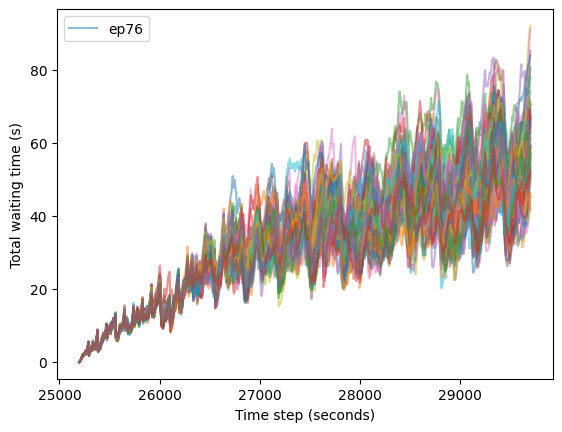

In [30]:
i = 0
for file in os.listdir(inputdir):
    if file.startswith('waitingTime'):
        i += 1
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        main_df = main_df[['step', 'system_mean_waiting_time']]
        plt.size = (30, 20)
        plt.xlabel('Time step (seconds)')
        plt.ylabel('Total waiting time (s)')
        plt.plot(main_df['step'], main_df['system_mean_waiting_time'], alpha=0.5)
        legend_list = []
        #print(i)
        legend_list.append(f'ep{i}')
print(legend_list)
plt.legend(legend_list)#['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8'])
plt.show()

In [17]:
for file in os.listdir(inputdir):
    if file.startswith('waitingTime'):
        i += 1
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)

In [76]:
main_df

step  system_total_stopped  system_total_waiting_time  \
0     25200.0                     0                        0.0   
1     25205.0                     3                        1.0   
2     25210.0                     3                        6.0   
3     25215.0                     3                       15.0   
4     25220.0                     4                       26.0   
...       ...                   ...                        ...   
5756  53980.0                 14461                  3392946.0   
5757  53985.0                 14467                  3396472.0   
5758  53990.0                 14480                  3393019.0   
5759  53995.0                 14533                  3397580.0   
5760  54000.0                 14572                  3403376.0   

      system_mean_waiting_time  system_mean_speed  system_total_CO2  \
0                     0.000000           0.000000      0.000000e+00   
1                     0.100000           3.174046      4.247253e+04   
2                     0.333333           4.543489      1.066634e+05   
3                     0.600000           6.285408      1.838540e+05   
4                     0.787879           5.624030      1.451824e+05   
...                        ...                ...               ...   
5756                224.134364           0.112172      4.630270e+07   
5757                224.456252           0.110324      4.629140e+07   
5758                224.228060           0.109989      4.630616e+07   
5759                224.396011           0.099727      4.631744e+07   
5760                224.793659           0.091290      4.619292e+07   

      system_total_PMx  system_total_NOx  system_total_noise_emission  \
0             0.000000          0.000000                     0.000000   
1             5.852833        246.907245                   513.962741   
2            14.097243        657.641744                   965.304712   
3            21.867242       1074.700680                  1388.206485   
4            18.597625        825.847388                  1728.170164   
...                ...               ...                          ...   
5756       6643.151926     240498.664715                757070.485976   
5757       6640.512809     240265.322574                756805.496195   
5758       6643.609306     240263.658815                756921.269440   
5759       6649.011542     240433.244825                756922.093988   
5760       6632.749277     239437.878396                756847.087528   

      system_local_CO2  ...  tls_161_accumulated_waiting_time  \
0             0.000000  ...                               0.0   
1             0.000000  ...                               0.0   
2             0.000000  ...                               0.0   
3             0.000000  ...                               0.0   
4             0.000000  ...                               0.0   
...                ...  ...                               ...   
5756     478468.959253  ...                           17808.0   
5757     479192.772127  ...                           17808.0   
5758     476663.605095  ...                           17808.0   
5759     474797.148138  ...                           17808.0   
5760     481537.063989  ...                           17808.0   

      tls_161_average_speed  tls_161_braking  \
0                       1.0              0.0   
1                       1.0              0.0   
2                       1.0              0.0   
3                       1.0              0.0   
4                       1.0              0.0   
...                     ...              ...   
5756                    0.0              0.0   
5757                    0.0              0.0   
5758                    0.0              0.0   
5759                    0.0              0.0   
5760                    0.0              0.0   

                       tls_161_controlled_lane_emission  tls_161_phase  \
0                                                    [

In [33]:
main_df.dtypes

step                                     float64
system_total_stopped                       int64
system_total_waiting_time                float64
system_mean_waiting_time                 float64
system_mean_speed                        float64
system_total_CO2                         float64
system_total_PMx                         float64
system_total_NOx                         float64
system_total_noise_emission              float64
system_local_CO2                         float64
system_local_PMx                         float64
system_local_NOx                         float64
system_local_noise_emission              float64
system_local_avg_speed                   float64
system_last_reward                       float64
total_brake_traffic_signals              float64
tls_159_stopped                            int64
tls_159_accumulated_waiting_time         float64
tls_159_average_speed                    float64
tls_159_braking                          float64
tls_159_controlled_l

In [42]:
test['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)

In [43]:
new = test['tls_159_controlled_lane_emission'].apply(pd.Series)

In [64]:
#new = new.dropna(how='all')
new = new.drop_duplicates()

CO2_emission   CO_emission  HC_emission  PMx_emission  NOx_emission  \
17     60120.824096     79.541593     0.000000      9.473628    505.092386   
18     66339.651789     85.805827     0.000000     10.010790    543.964816   
19     40878.259765     57.430820     0.000000      6.912087    343.879090   
37      7647.466555    103.226585     0.653466      0.150184      3.208589   
38      3518.651937      0.000000     0.000000      0.000567      0.856114   
...             ...           ...          ...           ...           ...   
5743  330166.001572  10029.838388    65.812696     60.852381   2176.827703   
5744  330037.554716  10013.195384    65.733185     60.844565   2176.744975   
5745  330165.247975  10029.721440    65.812141     60.852329   2176.827188   
5746  330166.111111  10029.855556    65.812778     60.852389   2176.827778   
5760  361388.711063  10112.475454    86.436411     69.371827   2472.336524   

      emission_combined  fuel_consumption  
17         12142.986340      18912.493444  
18         13395.886644      20868.685845  
19          8257.296352      12858.907625  
37          1550.941076       2439.165493  
38           703.901723       1122.319534  
...                 ...               ...  
5743       68499.866548     104538.853947  
5744       68470.814565     104497.881841  
5745       68499.692215     104538.613558  
5746       68499.891922     104538.888889  
5760       74825.866256     114415.870679  

[3424 rows x 7 columns]

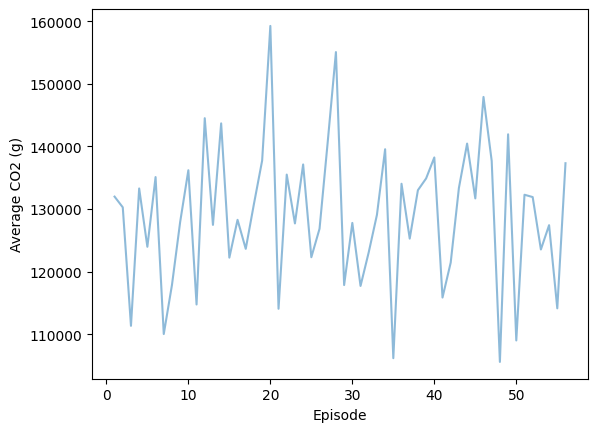

In [ ]:
import numpy as np

tls_159 = pd.DataFrame()
inputdir = '../src/data/model_outputs/'

# Initialize a list to store average CO2 emissions for each episode
avg_co2_emissions = []

for i, file in enumerate(os.listdir(inputdir)):
    if file.startswith('queue'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        
        # Calculate the average CO2 emission for this episode and add it to the list
        avg_co2_emissions.append(np.mean(tls_159['CO2_emission']))

# Plot the average CO2 emissions for each episode
#plt.figure(figsize=(60, 20))
plt.plot(range(1, len(avg_co2_emissions) + 1), avg_co2_emissions, alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Average CO2 (g)')
plt.show()

In [47]:
def plot_columns(df):
    plt.figure(figsize=(10,6))
    
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)
    
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

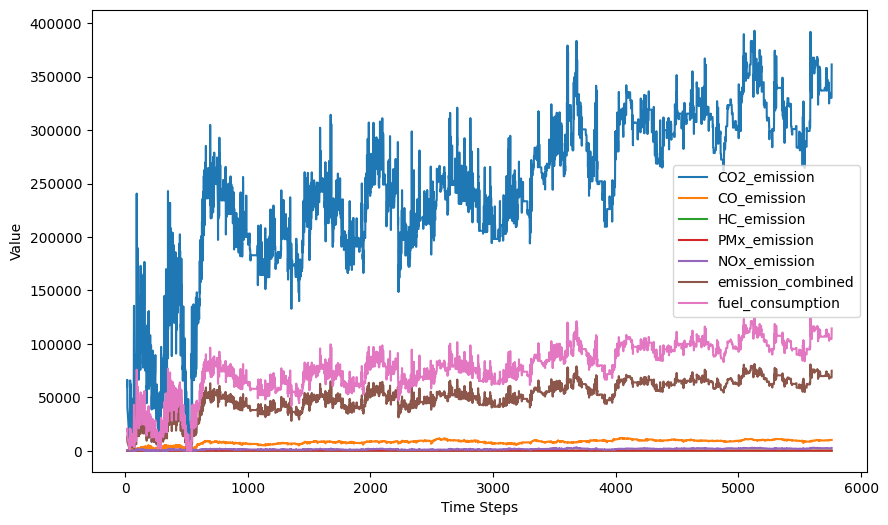

In [66]:
plot_columns(new)


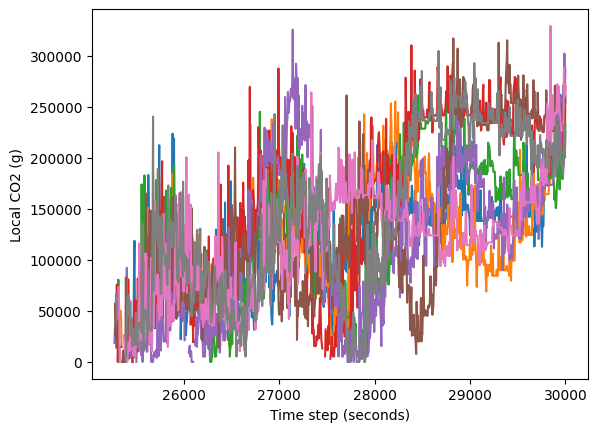

In [74]:
# plot local tls CO2 emission for each episode

tls_159 = pd.DataFrame()

inputdir = '../src/data/model_outputs/'

for file in os.listdir(inputdir):
    if file.startswith('waitingTime'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        main_df = main_df[main_df['step']<=30000]
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        plt.size = (60, 20)
        plt.xlabel('Time step (seconds)')
        plt.ylabel('Local CO2 (g)')
        # for column in tls_159.columns:
        #     plt.plot(tls_159.index, tls_159[column])
        plt.plot(tls_159['step'], tls_159['CO2_emission'])
        # legend_list = []
        # print(i)
        # legend_list.append(f'ep{i}')
        # plt.legend(['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8'])
plt.show()

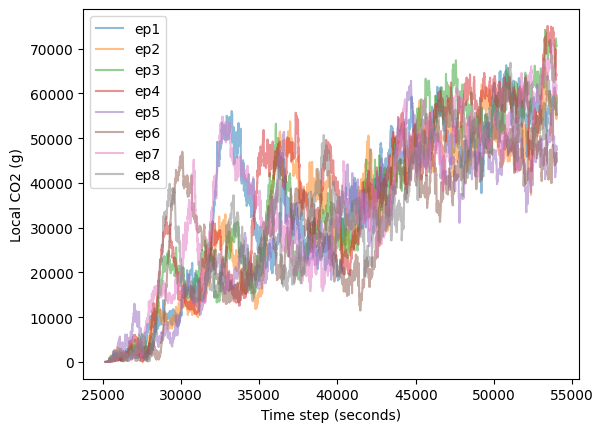

In [75]:
# plot local tls CO2 emission for each episode

tls_159 = pd.DataFrame()

inputdir = '../src/data/model_outputs/'

for file in os.listdir(inputdir):
    if file.startswith('waitingTime'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        #tls_159['tls_159_reward'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        #tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        #tls_159['steps'] = main_df['step']
        #tls_159 = tls_159.dropna(how='all')
        plt.size = (60, 20)
        plt.xlabel('Time step (seconds)')
        plt.ylabel('Local CO2 (g)')
        # for column in tls_159.columns:
        #     plt.plot(tls_159.index, tls_159[column])
        plt.plot(main_df['step'], main_df['agents_total_accumulated_waiting_time'], alpha=0.5)
        # legend_list = []
        # print(i)
        # legend_list.append(f'ep{i}')
        plt.legend(['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8'])
plt.show()

In [ ]:
# queue data

# plot local tls CO2 emission for each episode

tls_159 = pd.DataFrame()

inputdir = '../src/data/model_outputs/'

for file in os.listdir(inputdir):
    if file.startswith('queue'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        #main_df = main_df[main_df['step']<=30000]
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        plt.size = (60, 20)
        plt.xlabel('Time step (seconds)')
        plt.ylabel('Local CO2 (g)')
        # for column in tls_159.columns:
        #     plt.plot(tls_159.index, tls_159[column])
        plt.plot(tls_159['step'], tls_159['CO2_emission'], alpha=0.5)
        # legend_list = []
        # print(i)
        # legend_list.append(f'ep{i}')
        # plt.legend(['ep1', 'ep2', 'ep3', 'ep4', 'ep5', 'ep6', 'ep7', 'ep8'])
plt.show()

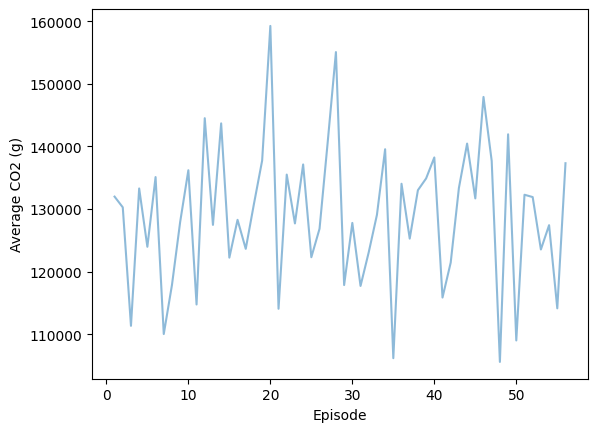

In [81]:
import numpy as np

tls_159 = pd.DataFrame()
inputdir = '../src/data/model_outputs/'

# Initialize a list to store average CO2 emissions for each episode
avg_co2_emissions = []

for i, file in enumerate(os.listdir(inputdir)):
    if file.startswith('queue'):
        main_df = pd.DataFrame()
        main_df = pd.read_csv(inputdir + file)
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        
        # Calculate the average CO2 emission for this episode and add it to the list
        avg_co2_emissions.append(np.mean(tls_159['CO2_emission']))

# Plot the average CO2 emissions for each episode
#plt.figure(figsize=(60, 20))
plt.plot(range(1, len(avg_co2_emissions) + 1), avg_co2_emissions, alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Average CO2 (g)')
plt.show()

In [94]:
# view all columns in dataframe
pd.set_option('display.max_columns', None)

In [95]:
main_df

step  system_total_stopped  system_total_waiting_time  \
0    25200.0                     0                        0.0   
1    25205.0                     3                        1.0   
2    25210.0                     3                        6.0   
3    25215.0                     3                       16.0   
4    25220.0                     6                       31.0   
..       ...                   ...                        ...   
896  29680.0                   744                    60233.0   
897  29685.0                   774                    61374.0   
898  29690.0                   786                    61225.0   
899  29695.0                   792                    62013.0   
900  29700.0                   787                    62117.0   

     system_mean_waiting_time  system_mean_speed  system_total_CO2  \
0                    0.000000           0.000000      0.000000e+00   
1                    0.100000           3.606116      5.276023e+04   
2                    0.333333           5.068939      1.097898e+05   
3                    0.640000           6.582069      1.650968e+05   
4                    0.939394           5.813063      1.383185e+05   
..                        ...                ...               ...   
896                 43.869629           3.194744      5.161868e+06   
897                 44.733236           3.224940      5.247981e+06   
898                 44.592134           3.203477      5.324917e+06   
899                 45.133188           3.263358      4.996321e+06   
900                 45.473646           3.198953      5.281992e+06   

     system_total_PMx  system_total_NOx  system_total_noise_emission  \
0            0.000000          0.000000                     0.000000   
1            6.686134        297.342218                   524.453455   
2           14.001480        644.206052                   977.377044   
3           20.034734        977.316858                  1373.933181   
4           18.625524        818.267968                  1714.845639   
..                ...               ...                          ...   
896        731.936724      30390.235578                 70524.044444   
897        731.538384      30355.274478                 70504.761407   
898        751.713747      31236.786940                 70642.074395   
899        702.752555      28552.063848                 70704.234580   
900        747.132372      30919.065460                 70151.044104   

     system_local_CO2  system_local_PMx  system_local_NOx  \
0            0.000000          0.000000          0.000000   
1            0.000000          0.000000          0.000000   
2            0.000000          0.000000          0.000000   
3            0.000000          0.000000          0.000000   
4            0.000000          0.000000          0.000000   
..                ...               ...               ...   
896     137363.663654         21.156066        838.289975   
897     144636.805229         21.616449        869.707722   
898     108060.108803         15.135731        567.174004   
899      77705.393836          8.050092        291.575563   
900      94773.485168         12.363914        451.219860   

     system_local_noise_emission  system_local_avg_speed  system_last_reward  \
0                       0.000000                0.000000            0.000000   
1                       0.000000                0.000000            0.000000   
2                       0.000000                0.000000            0.000000   
3                       0.000000                0.000000            0.000000   
4                       0.000000                0.000000            0.000000   
..                           ...                     ...                 ...   
896                  1827.606540                0.250943          -10.000000   
897                  1956.084843                1.184340           -8.666667   
898                  1866.076152                1.007481           -

<Figure size 4000x2000 with 0 Axes>

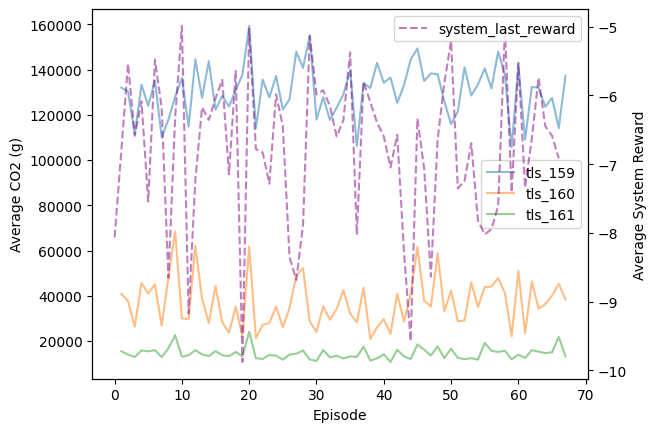

In [90]:

inputdir = '../src/data/model_outputs/'

# Initialize lists to store average CO2 emissions for each episode
avg_co2_emissions_159 = []
avg_co2_emissions_160 = []
avg_co2_emissions_161 = []
avg_sys_last_reward = []

for i, file in enumerate(os.listdir(inputdir)):
    if file.startswith('queue'):
        main_df = pd.read_csv(inputdir + file)
        
        # Add calculation for avg_sys_last_reward
        avg_sys_last_reward.append(main_df['system_last_reward'].mean())
        
        # Process tls_159
        tls_159 = pd.DataFrame()
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        avg_co2_emissions_159.append(np.mean(tls_159['CO2_emission']))
        
        # Process tls_160
        tls_160 = pd.DataFrame()
        tls_160['tls_160_controlled_lane_emission'] = main_df['tls_160_controlled_lane_emission'].apply(ast.literal_eval)
        tls_160 = tls_160['tls_160_controlled_lane_emission'].apply(pd.Series)
        tls_160['step'] = main_df['step']
        tls_160 = tls_160.dropna(how='all')
        avg_co2_emissions_160.append(np.mean(tls_160['CO2_emission']))
        
        # Process tls_161
        tls_161 = pd.DataFrame()
        tls_161['tls_161_controlled_lane_emission'] = main_df['tls_161_controlled_lane_emission'].apply(ast.literal_eval)
        tls_161 = tls_161['tls_161_controlled_lane_emission'].apply(pd.Series)
        tls_161['step'] = main_df['step']
        tls_161 = tls_161.dropna(how='all')
        avg_co2_emissions_161.append(np.mean(tls_161['CO2_emission']))

# Plot the average CO2 emissions for each episode
plt.figure(figsize=(40, 20))
fig, ax1 = plt.subplots()

# Plot CO2 emissions on primary y-axis
ax1.plot(range(1, len(avg_co2_emissions_159) + 1), avg_co2_emissions_159, alpha=0.5, label='tls_159')
ax1.plot(range(1, len(avg_co2_emissions_160) + 1), avg_co2_emissions_160, alpha=0.5, label='tls_160')
ax1.plot(range(1, len(avg_co2_emissions_161) + 1), avg_co2_emissions_161, alpha=0.5, label='tls_161')

# Labels for first graph
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average CO2 (g)')
ax1.legend(['tls_159', 'tls_160', 'tls_161'])

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot system_last_reward on secondary y-axis
ax2.plot(avg_sys_last_reward, color='purple', linestyle='--', alpha=0.5, label='system_last_reward')

# Label for second graph
ax2.set_ylabel('Average System Reward')
ax2.legend(loc='upper right')

plt.show()


#plt.plot(range(1, len(avg_co2_emissions_159) + 1), avg_co2_emissions_159, alpha=0.5, label='tls_159')
#plt.plot(range(1, len(avg_co2_emissions_160) + 1), avg_co2_emissions_160, alpha=0.5, label='tls_160')
#plt.plot(range(1, len(avg_co2_emissions_161) + 1), avg_co2_emissions_161, alpha=0.5, label='tls_161')

#plt.xlabel('Episode')
#plt.ylabel('Average CO2 (g)')
#plt.legend(['tls_159', 'tls_160', 'tls_161'])
#plt.show()

In [88]:
import numpy as np

inputdir = '../src/data/model_outputs/'

# Initialize dictionaries to store minimum emissions for each episode
min_emissions_159 = {'CO2_emission': float('inf'), 'CO_emission': float('inf'), 'HC_emission': float('inf'), 'PMx_emission': float('inf'), 'NOx_emission': float('inf')}
min_emissions_160 = {'CO2_emission': float('inf'), 'CO_emission': float('inf'), 'HC_emission': float('inf'), 'PMx_emission': float('inf'), 'NOx_emission': float('inf')}
min_emissions_161 = {'CO2_emission': float('inf'), 'CO_emission': float('inf'), 'HC_emission': float('inf'), 'PMx_emission': float('inf'), 'NOx_emission': float('inf')}

# Initialize dictionaries to store episode with minimum emissions for each tls
min_episode_159 = {}
min_episode_160 = {}
min_episode_161 = {}

for i, file in enumerate(os.listdir(inputdir)):
    if file.startswith('queue'):
        # Extract episode name from file name
        episode_name = file.split('_')[1]  # adjust this based on your file naming convention
        
        main_df = pd.read_csv(inputdir + file)
        
        # Process tls_159
        tls_159 = pd.DataFrame()
        tls_159['tls_159_controlled_lane_emission'] = main_df['tls_159_controlled_lane_emission'].apply(ast.literal_eval)
        tls_159 = tls_159['tls_159_controlled_lane_emission'].apply(pd.Series)
        tls_159['step'] = main_df['step']
        tls_159 = tls_159.dropna(how='all')
        
        # Update minimum emissions and corresponding episode for tls_159
        for emission in min_emissions_159.keys():
            min_value = np.min(tls_159[emission])
            if min_value < min_emissions_159[emission] and min_value > 0:
                min_emissions_159[emission] = min_value
                min_episode_159[emission] = episode_name
        
        # Process tls_160
        tls_160 = pd.DataFrame()
        tls_160['tls_160_controlled_lane_emission'] = main_df['tls_160_controlled_lane_emission'].apply(ast.literal_eval)
        tls_160 = tls_160['tls_160_controlled_lane_emission'].apply(pd.Series)
        tls_160['step'] = main_df['step']
        tls_160 = tls_160.dropna(how='all')
        
        # Update minimum emissions and corresponding episode for tls_160
        for emission in min_emissions_160.keys():
            min_value = np.min(tls_160[emission])
            if min_value < min_emissions_160[emission] and min_value > 0:
                min_emissions_160[emission] = min_value
                min_episode_160[emission] = episode_name
        
        # Process tls_161
        tls_161 = pd.DataFrame()
        tls_161['tls_161_controlled_lane_emission'] = main_df['tls_161_controlled_lane_emission'].apply(ast.literal_eval)
        tls_161 = tls_161['tls_161_controlled_lane_emission'].apply(pd.Series)
        tls_161['step'] = main_df['step']
        tls_161 = tls_161.dropna(how='all')
        
        # Update minimum emissions and corresponding episode for tls_161
        for emission in min_emissions_161.keys():
            min_value = np.min
            
    # Print minimum emissions and corresponding episodes
print('Minimum emissions for tls_159:', min_emissions_159)
print('Episodes with minimum emissions for tls_159:', min_episode_159)
print('Minimum emissions for tls_160:', min_emissions_160)
print('Episodes with minimum emissions for tls_160:', min_episode_160)
print('Minimum emissions for tls_161:', min_emissions_161)
print('Episodes with minimum emissions for tls_161:', min_episode_161)

Minimum emissions for tls_159: {'CO2_emission': 1345.1091843756267, 'CO_emission': 10.4170887758214, 'HC_emission': inf, 'PMx_emission': 0.002605111555797454, 'NOx_emission': 0.2635750819185546}
Episodes with minimum emissions for tls_159: {'CO2_emission': '200000', 'PMx_emission': '200000', 'NOx_emission': '200000', 'CO_emission': '200000'}
Minimum emissions for tls_160: {'CO2_emission': inf, 'CO_emission': inf, 'HC_emission': inf, 'PMx_emission': inf, 'NOx_emission': inf}
Episodes with minimum emissions for tls_160: {}
Minimum emissions for tls_161: {'CO2_emission': inf, 'CO_emission': inf, 'HC_emission': inf, 'PMx_emission': inf, 'NOx_emission': inf}
Episodes with minimum emissions for tls_161: {}


In [ ]:
inputdir = '../src/data/model_outputs/'

i = 1
df = pd.DataFrame()
for file in os.listdir(inputdir):
    if file.startswith('avg_speed'):
        # create dataframe for all files that start with avg_speed
        temp_df = pd.read_csv(os.path.join(inputdir, file))
        temp_df['episode'] = i
        df = df.append(temp_df, ignore_index=True)
        i += 1

In [6]:
df_grouped.system_last_reward

episode
1     0.335326
2     0.370231
3     0.335576
4     0.306631
5     0.305620
        ...   
79    0.310187
80    0.410490
81    0.417322
82    0.416298
83    0.399925
Name: system_last_reward, Length: 83, dtype: float64

In [5]:
# group dataframe by episode and get averages
df_grouped = df.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_24997/4275623981.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('episode').mean()


In [47]:
np.mean(df.system_local_CO2)

91988.95633249861

In [48]:
df.system_local_CO2.describe()

count     73199.000000
mean      91988.956332
std       55774.253360
min           0.000000
25%       52984.120075
50%       83283.678420
75%      120852.200323
max      395547.152681
Name: system_local_CO2, dtype: float64

<Figure size 4000x2000 with 0 Axes>

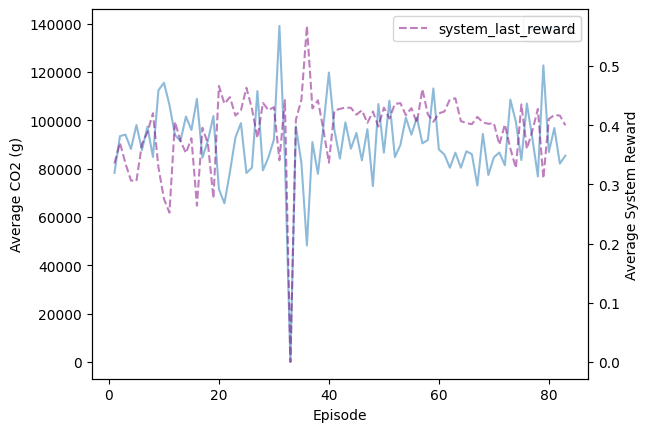

In [8]:
# plot local CO2 emission and last reward on two axis

# Plot the average CO2 emissions for each episode
plt.figure(figsize=(40, 20))
fig, ax1 = plt.subplots()

# Plot CO2 emissions on primary y-axis
ax1.plot(df_grouped['system_local_CO2'], alpha=0.5, label='CO2 emission')


# Labels for first graph
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average CO2 (g)')
ax1.legend('Last Reward')

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot system_last_reward on secondary y-axis
ax2.plot(df_grouped['system_last_reward'], color='purple', linestyle='--', alpha=0.5, label='system_last_reward')

# Label for second graph
ax2.set_ylabel('Average System Reward')
ax2.legend(loc='upper right')

plt.show()


In [ ]:
inputdir = '../src/data/model_outputs/'

i = 1
df_queue = pd.DataFrame()
for file in os.listdir(inputdir):
    if file.startswith('queue'):
        # create dataframe for all files that start with avg_speed
        temp_df_queue = pd.read_csv(os.path.join(inputdir, file))
        temp_df_queue['episode'] = i
        df_queue = df_queue.append(temp_df_queue, ignore_index=True)
        i += 1

In [11]:
grouped_queue = df_queue.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_24997/3505794712.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_queue = df_queue.groupby('episode').mean()


In [20]:
grouped_queue.system_local_CO2.describe()

count        76.000000
mean      97832.340416
std       13453.162162
min       69311.025228
25%       87821.952537
50%       98123.148930
75%      103998.018390
max      138066.016280
Name: system_local_CO2, dtype: float64

<Figure size 4000x2000 with 0 Axes>

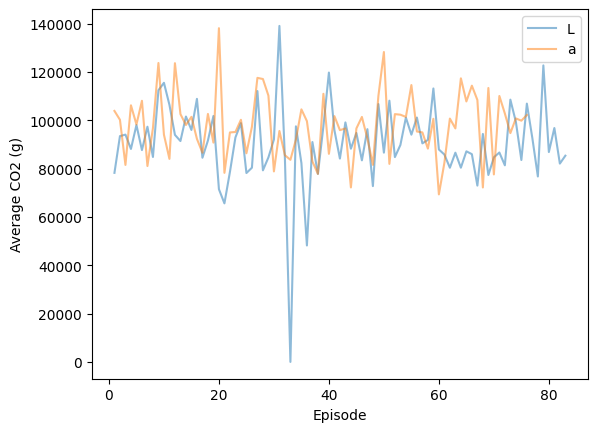

In [17]:
# plot local CO2 emission and last reward on two axis

# Plot the average CO2 emissions for each episode
plt.figure(figsize=(40, 20))
fig, ax1 = plt.subplots()

# Plot CO2 emissions on primary y-axis
ax1.plot(df_grouped['system_local_CO2'], alpha=0.5, label='speed CO2 emission')
ax1.plot(grouped_queue['system_local_CO2'], alpha=0.5, label='queue CO2 emission')


# Labels for first graph
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average CO2 (g)')
ax1.legend('Last Reward')

# Create secondary y-axis
#ax2 = ax1.twinx()

# Plot system_last_reward on secondary y-axis
##ax2.plot(df_grouped['system_last_reward'], linestyle='--', alpha=0.5, label='speed_reward')
ax2.plot(grouped_queue['system_last_reward'], linestyle='--', alpha=0.5, label='queue_reward')

# Label for second graph
#ax2.set_ylabel('Average System Reward')
ax2.legend(loc='upper right')

plt.show()

In [39]:
# get episodes with highest reward and the respective local CO2 emission

df_grouped['system_local_CO2'][df_grouped['system_last_reward'] == df_grouped['system_last_reward'].max()]

episode
36    48171.403539
Name: system_local_CO2, dtype: float64

In [44]:
# get episodes with highest reward and the respective local CO2 emission

df_grouped['system_local_CO2'][df_grouped['system_last_reward'] == df_grouped['system_last_reward'].max()]

episode
36    48171.403539
Name: system_local_CO2, dtype: float64

In [40]:
# get episodes with highest reward and the respective local CO2 emission

grouped_queue['system_local_CO2'][grouped_queue['system_last_reward'] == grouped_queue['system_last_reward'].max()]

episode
60    69311.025228
Name: system_local_CO2, dtype: float64

#### Brake Reward

In [ ]:
inputdir = '../src/data/model_outputs/'

i = 1
df_brake = pd.DataFrame()
for file in os.listdir(inputdir):
    if file.startswith('minimizebrake'):
        # create dataframe for all files that start with avg_speed
        temp_df_brake = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake['episode'] = i
        df_brake = df_brake.append(temp_df_brake, ignore_index=True)
        i += 1

In [3]:
df_brake

step  system_total_stopped  system_total_waiting_time  \
0      25200.0                     0                        0.0   
1      25205.0                     3                        1.0   
2      25210.0                     4                        8.0   
3      25215.0                     3                       18.0   
4      25220.0                     6                       33.0   
...        ...                   ...                        ...   
67788  29680.0                     1                   223939.0   
67789  29685.0                     1                   226460.0   
67790  29690.0                     1                   228959.0   
67791  29695.0                     1                   228668.0   
67792  29700.0                     0                   229817.0   

       system_mean_waiting_time  system_mean_speed  system_total_CO2  \
0                      0.000000           0.000000      0.000000e+00   
1                      0.100000           3.581038      4.944388e+04   
2                      0.444444           5.309695      1.158864e+05   
3                      0.720000           6.573078      1.837692e+05   
4                      1.000000           5.745439      1.525943e+05   
...                         ...                ...               ...   
67788                102.395519           0.000000      7.702126e+06   
67789                103.453632           0.000000      7.617046e+06   
67790                104.309339           0.000000      7.660967e+06   
67791                104.129326           0.000000      7.820874e+06   
67792                104.795714           7.000000      7.711173e+06   

       system_total_PMx  system_total_NOx  system_total_noise_emission  \
0              0.000000          0.000000                     0.000000   
1              6.558810        292.771976                   518.935730   
2             15.209722        730.295400                   982.222165   
3             21.667277       1063.179810                  1377.058237   
4             19.983617        918.453408                  1726.844012   
...                 ...               ...                          ...   
67788       1147.765811      44641.553020                113319.714701   
67789       1136.670418      43723.844929                113276.050148   
67790       1145.296954      44242.927292                113613.896419   
67791       1181.932253      45952.804942                113459.278108   
67792       1166.287145      45162.753194                113018.021888   

       system_local_CO2  ...  tls_161_average_speed  tls_161_braking  \
0              0.000000  ...                    1.0              0.0   
1              0.000000  ...                    1.0              0.0   
2              0.000000  ...                    1.0              0.0   
3              0.000000  ...                    1.0              0.0   
4              0.000000  ...                    1.0              0.0   
...                 ...  ...                    ...              ...   
67788     173278.881355  ...                    0.0              0.0   
67789     176001.957310  ...                    0.0              0.0   
67790     176002.222222  ...                    0.0              0.0   
67791     175696.485285  ...                    0.0              0.0   
67792     176002.148949  ...                    0.0              0.0   

       tls_161_acceleration  \
0                       0.0   
1                       0.0   
2                       0.0   
3                       0.0   
4                       0.0   
...                     ...   
67788                   0.0   
67789                   0.0   
67790                   0.0   
67791                   0.0   
67792                   0.0   

                        tls_161_controlled_lane_emission  tls_161_phase  \
0                                                     []              0   
1                                                     []       

In [4]:
df_brake.columns

Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 'system_total_CO2',
       'system_total_PMx', 'system_total_NOx', 'system_total_noise_emission',
       'system_local_CO2', 'system_local_CO', 'system_local_HC',
       'system_local_PMx', 'system_local_NOx', 'system_local_noise_emission',
       'system_local_#vehicles', 'system_local_avgSpeedsperType',
       'system_local_avg_speed', 'system_last_reward',
       'total_brake_traffic_signals', 'local_acceleration', 'tls_159_stopped',
       'tls_159_accumulated_waiting_time', 'tls_159_average_speed',
       'tls_159_braking', 'tls_159_acceleration',
       'tls_159_controlled_lane_emission', 'tls_159_phase', 'tls_159_state',
       'tls_159_reward', 'tls_160_stopped', 'tls_160_accumulated_waiting_time',
       'tls_160_average_speed', 'tls_160_braking', 'tls_160_acceleration',
       'tls_160_controlled_lane_emission', 'tls_160_phase', 'tls_160_state',
       '

In [8]:
df_brake[['system_last_reward', 'tls_159_reward', 'tls_160_reward', 'tls_161_reward']].describe()

system_last_reward  tls_159_reward  tls_160_reward  tls_161_reward
count        6.779300e+04    67792.000000    67792.000000    67792.000000
mean        -7.371563e-01       -0.507758       -0.721464       -0.984887
std          9.831192e-01        1.446119        1.586325        1.842924
min         -1.199007e+01      -20.424822      -18.854722      -16.701687
25%         -1.251599e+00       -0.122631       -0.467049       -1.049269
50%         -2.641803e-01        0.000000        0.000000        0.000000
75%         -1.591609e-15        0.000000        0.000000        0.000000
max          0.000000e+00        0.000000        0.000000        0.000000

#### Speed Reward

In [ ]:
inputdir = '../src/data/model_outputs/'

i = 1
df_speed = pd.DataFrame()
for file in os.listdir(inputdir):
    if file.startswith('speed'):
        # create dataframe for all files that start with avg_speed
        temp_df_brake = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake['episode'] = i
        df_speed = df_speed.append(temp_df_brake, ignore_index=True)
        i += 1

In [11]:
df_speed[['system_last_reward', 'tls_159_reward', 'tls_160_reward', 'tls_161_reward']].describe()

system_last_reward  tls_159_reward  tls_160_reward  tls_161_reward
count        67792.000000    67791.000000    67791.000000    67791.000000
mean            -0.407643       -0.509750       -0.368874       -0.345838
std              0.560291        1.052280        0.852627        0.828579
min             -5.275511      -12.466043       -8.921320       -9.311806
25%             -0.693630       -0.645032       -0.270925       -0.109168
50%             -0.210806        0.000000        0.000000        0.000000
75%              0.000000        0.000880        0.000000        0.000000
max              0.500000        0.518618        0.500000        0.500000

### Compare Training Performance of Different Reward Functions

#### Load Episode Data for each Reward Function: 
Speed, Queue, Brake, Brake + Acceleration, Diff Waiting Time, Combined Emission, Pressure, Speed + Brake (?)

In [3]:
inputdir = '../src/data/model_outputs/'

In [ ]:
# get all training episode data for different rewards

# counter for episodes
i_speed = 1
i_brake = 1
i_queue = 1
i_waitTime = 1
i_brake_accel = 1
i_pressure = 1
i_combinedEmission = 1
i_brake_speed = 1

# create dataframe for each reward type
df_speed = pd.DataFrame()
df_brake = pd.DataFrame()
df_queue = pd.DataFrame()
df_waitTime = pd.DataFrame()
df_brake_accel = pd.DataFrame()
df_pressure = pd.DataFrame()
df_combinedEmission = pd.DataFrame()
df_brake_speed = pd.DataFrame()

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_speed
    if file.startswith('average-speed'):
        temp_df_speed = pd.read_csv(os.path.join(inputdir, file))
        temp_df_speed['episode'] = i_speed # add episode column
        df_speed = df_speed.append(temp_df_speed, ignore_index=True)
        i_speed += 1
    # create dataframe for all files that start with minimizebrake
    elif file.startswith('minimizebrake'):
        temp_df_brake = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake['episode'] = i_brake # add episode column
        df_brake = df_brake.append(temp_df_brake, ignore_index=True)
        i_brake += 1
    # create dataframe for all files that start with queue
    elif file.startswith('queue'):
        temp_df_queue = pd.read_csv(os.path.join(inputdir, file))
        temp_df_queue['episode'] = i_queue # add episode column
        df_queue = df_queue.append(temp_df_queue, ignore_index=True)
        i_queue += 1
    # create dataframe for all files that start with waitingTime
    elif file.startswith('waitingTime'):
        temp_df_waitTime = pd.read_csv(os.path.join(inputdir, file))
        temp_df_waitTime['episode'] = i_waitTime # add episode column
        df_waitTime = df_waitTime.append(temp_df_waitTime, ignore_index=True)
        i_waitTime += 1
    # create dataframe for all files that start with brake_acceleration
    elif file.startswith('brake_acceleration'):
        temp_df_brake_accel = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake_accel['episode'] = i_brake_accel # add episode column
        df_brake_accel = df_brake_accel.append(temp_df_brake_accel, ignore_index=True)
        i_brake_accel += 1
    # create dataframe for all files that start with pressure
    elif file.startswith('pressure'):
        temp_df_pressure = pd.read_csv(os.path.join(inputdir, file))
        temp_df_pressure['episode'] = i_pressure
        df_pressure = df_pressure.append(temp_df_pressure, ignore_index=True)
        i_pressure += 1
    # create dataframe for all files that start with combined_emission
    elif file.startswith('combined_emission'):
        temp_df_combinedEmission = pd.read_csv(os.path.join(inputdir, file))
        temp_df_combinedEmission['episode'] = i_combinedEmission
        df_combinedEmission = df_combinedEmission.append(temp_df_combinedEmission, ignore_index=True)
        i_combinedEmission += 1
    # create dataframe for all files that start with speedbrake
    elif file.startswith('speedbrake'):
        temp_df_brake_speed = pd.read_csv(os.path.join(inputdir, file))
        temp_df_brake_speed['episode'] = i_brake_speed
        df_brake_speed = df_brake_speed.append(temp_df_brake_speed, ignore_index=True)
        i_brake_speed += 1


In [8]:
# drop rows with that do not have any vehicles on the controlled lanes yet and get share of dataframe dropped
old_val = df_speed.shape[0]
df_speed = df_speed[df_speed['system_local_#vehicles'] != 0]
new_val = df_speed.shape[0]
print(old_val, new_val)
print('Share remaining: ', (new_val/old_val)*100)

old_val = df_brake.shape[0]
df_brake = df_brake[df_brake['system_local_#vehicles'] != 0]
new_val =  df_brake.shape[0]
print(old_val, new_val)
print('Share remaining: ', (new_val/old_val)*100)

old_val = df_queue.shape[0]
df_queue = df_queue[df_queue['system_local_#vehicles'] != 0]
new_val = df_queue.shape[0]
print(old_val, new_val)
print(' Share remaining: ', (new_val/old_val)*100)

old_val = df_waitTime.shape[0]
df_waitTime = df_waitTime[df_waitTime['system_local_#vehicles'] != 0]
new_val = df_waitTime.shape[0]
print(old_val, new_val)
print('Share remaining: ', (new_val/old_val)*100)

old_val = df_brake_accel.shape[0]
df_brake_accel = df_brake_accel[df_brake_accel['system_local_#vehicles'] != 0]
new_val = df_brake_accel.shape[0]
print(old_val, new_val)
print('Share remaining: ', (new_val/old_val)*100)

old_val = df_pressure.shape[0]
df_pressure = df_pressure[df_pressure['system_local_#vehicles'] != 0]
new_val = df_pressure.shape[0]
print(old_val, new_val)
print('Share remaining: ', (new_val/old_val)*100)

old_val = df_combinedEmission.shape[0]
df_combinedEmission = df_combinedEmission[df_combinedEmission['system_local_#vehicles'] != 0]
new_val = df_combinedEmission.shape[0]
print(old_val, new_val)
print('Share remaining: ', (new_val/old_val)*100)

old_val = df_brake_speed.shape[0]
df_brake_speed = df_brake_speed[df_brake_speed['system_local_#vehicles'] != 0]
new_val = df_brake_speed.shape[0]
print(old_val, new_val)
print('Share dropped: ', (new_val/old_val)*100)

67792 66302
Share remaining:  97.80210054283691
67793 66835
Share remaining:  98.5868747510805
67792 66865
 Share remaining:  98.63258201557706
67792 66385
Share remaining:  97.92453386830304
67792 66868
Share remaining:  98.63700731649753
67792 66509
Share remaining:  98.10744630634883
67792 66535
Share remaining:  98.14579891432618
67792 66550
Share dropped:  98.16792541892849


In [91]:
# get columns of dataframes

df_pressure.columns

Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 'system_total_CO2',
       'system_total_PMx', 'system_total_NOx', 'system_total_noise_emission',
       'system_local_CO2', 'system_local_CO', 'system_local_HC',
       'system_local_PMx', 'system_local_NOx', 'system_local_noise_emission',
       'system_local_#vehicles', 'system_local_avgSpeedsperType',
       'system_local_veh_types', 'system_local_avg_speed',
       'system_last_reward', 'total_brake_traffic_signals',
       'local_acceleration', 'tls_159_stopped',
       'tls_159_accumulated_waiting_time', 'tls_159_average_speed',
       'tls_159_braking', 'tls_159_acceleration',
       'tls_159_controlled_lane_emission', 'tls_159_phase', 'tls_159_state',
       'tls_159_reward', 'tls_160_stopped', 'tls_160_accumulated_waiting_time',
       'tls_160_average_speed', 'tls_160_braking', 'tls_160_acceleration',
       'tls_160_controlled_lane_emission', 'tls_160_

#### Compare emissions

##### CO2 Comparison

###### Average Emission

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/1841993625.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_CO2['speed'] = df_speed.groupby('episode').mean()['system_local_CO2']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/1841993625.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_CO2['brake'] = df_brake.groupby('episode').mean()['system_local_CO2']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/1841993625.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only w

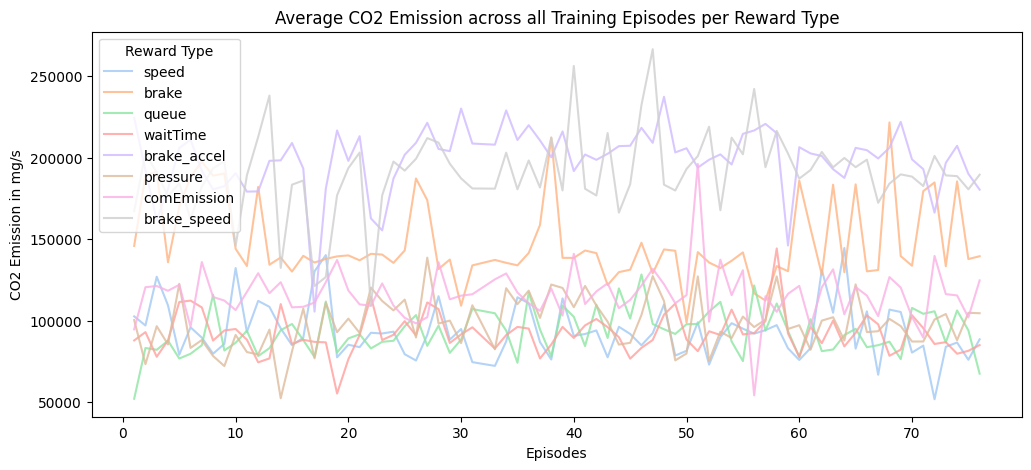

In [60]:
# new dataframe with local emissions for each reward type 

local_CO2 = pd.DataFrame()

local_CO2['speed'] = df_speed.groupby('episode').mean()['system_local_CO2']
local_CO2['brake'] = df_brake.groupby('episode').mean()['system_local_CO2']
local_CO2['queue'] = df_queue.groupby('episode').mean()['system_local_CO2']
local_CO2['waitTime'] = df_waitTime.groupby('episode').mean()['system_local_CO2']
local_CO2['brake_accel'] = df_brake_accel.groupby('episode').mean()['system_local_CO2']
local_CO2['pressure'] = df_pressure.groupby('episode').mean()['system_local_CO2']
local_CO2['comEmission'] = df_combinedEmission.groupby('episode').mean()['system_local_CO2']
local_CO2['brake_speed'] = df_brake_speed.groupby('episode').mean()['system_local_CO2']

local_CO2.dropna(inplace=True) # drop episodes that are empty for some reward types

# get average CO2 emission across all episodes plot local CO2 emission for entire training process for each reward type in one figure

plt.figure(figsize=(12,5))

sns.set_palette("pastel")

for column in local_CO2.columns:
       plt.plot(local_CO2.index, local_CO2[column], label=column, alpha=0.8) # divide by 1000 to get g
       
plt.xlabel('Episodes')
plt.ylabel('CO2 Emission in mg/s')  
plt.legend(title='Reward Type', fancybox=True, loc='upper left')
plt.title('Average CO2 Emission across all Training Episodes per Reward Type')
plt.show()

In [14]:
# get mean of each reward types' average since the plots still overlap too much for clear identification

local_CO2.mean().sort_values()

waitTime        92231.168775
queue           92791.439542
speed           93809.728465
pressure        98473.268562
comEmission    116331.538008
brake          148316.294571
brake_speed    190676.588003
brake_accel    199078.306840
dtype: float64

In [15]:
# get minimum of each reward types' average 
local_CO2.dropna().min().sort_values()

speed           51908.267516
queue           52197.732132
pressure        52498.888211
comEmission     54277.738815
waitTime        55404.529234
brake           98940.853004
brake_accel    105685.874323
brake_speed    109201.858419
dtype: float64

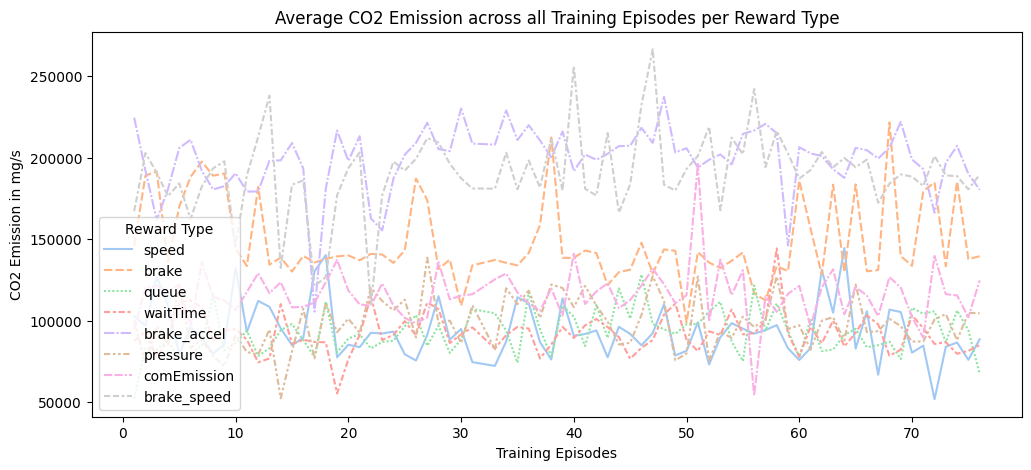

In [17]:
# plot with seaborn
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=local_CO2, palette='pastel')
ax.set_xlabel('Training Episodes')
ax.set_ylabel('CO2 Emission in mg/s')
ax.set_title('Average CO2 Emission across all Training Episodes per Reward Type')
ax.legend(title='Reward Type', loc='lower left', fancybox=True)

##### CO Comparison

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/20523996.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_CO['speed'] = df_speed.groupby('episode').mean()['system_local_CO']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/20523996.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_CO['brake'] = df_brake.groupby('episode').mean()['system_local_CO']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/20523996.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will defaul

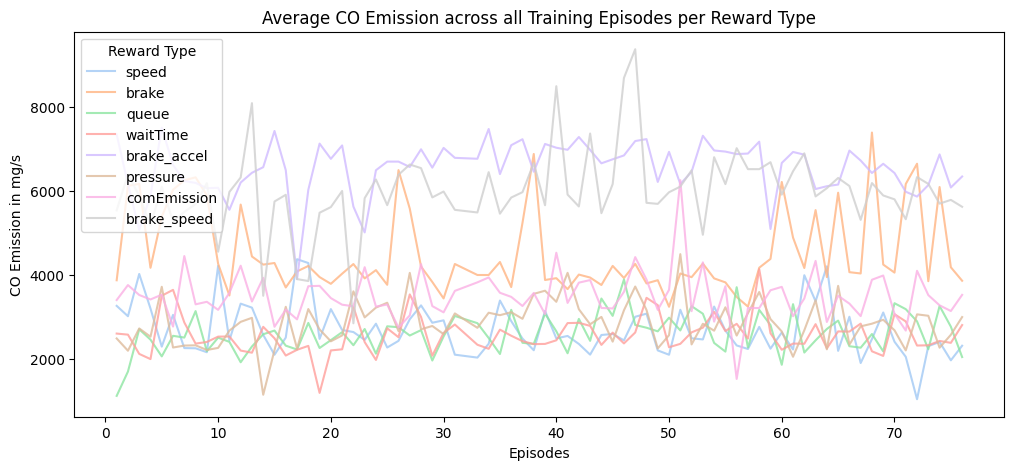

waitTime       2578.389574
queue          2607.006527
speed          2709.571612
pressure       2863.375866
comEmission    3506.703233
brake          4532.628119
brake_speed    5997.468531
brake_accel    6553.491953
dtype: float64


In [61]:
# new dataframe with local emissions for each reward type 

local_CO = pd.DataFrame()

local_CO['speed'] = df_speed.groupby('episode').mean()['system_local_CO']
local_CO['brake'] = df_brake.groupby('episode').mean()['system_local_CO']
local_CO['queue'] = df_queue.groupby('episode').mean()['system_local_CO']
local_CO['waitTime'] = df_waitTime.groupby('episode').mean()['system_local_CO']
local_CO['brake_accel'] = df_brake_accel.groupby('episode').mean()['system_local_CO']
local_CO['pressure'] = df_pressure.groupby('episode').mean()['system_local_CO']
local_CO['comEmission'] = df_combinedEmission.groupby('episode').mean()['system_local_CO']
local_CO['brake_speed'] = df_brake_speed.groupby('episode').mean()['system_local_CO']

local_CO.dropna(inplace=True) # drop episodes that are empty for some reward types

# get average CO emission across all episodes plot local CO emission for entire training process for each reward type in one figure

plt.figure(figsize=(12,5))

for column in local_CO.columns:
       plt.plot(local_CO.index, local_CO[column], label=column, alpha=0.8) 
       
plt.xlabel('Episodes')
plt.ylabel('CO Emission in mg/s')  
plt.legend(title='Reward Type', fancybox=True, loc='upper left')
plt.title('Average CO Emission across all Training Episodes per Reward Type')
plt.show()

# get mean of each reward types' average since the plots still overlap too much for clear identification

print(local_CO.mean().sort_values())

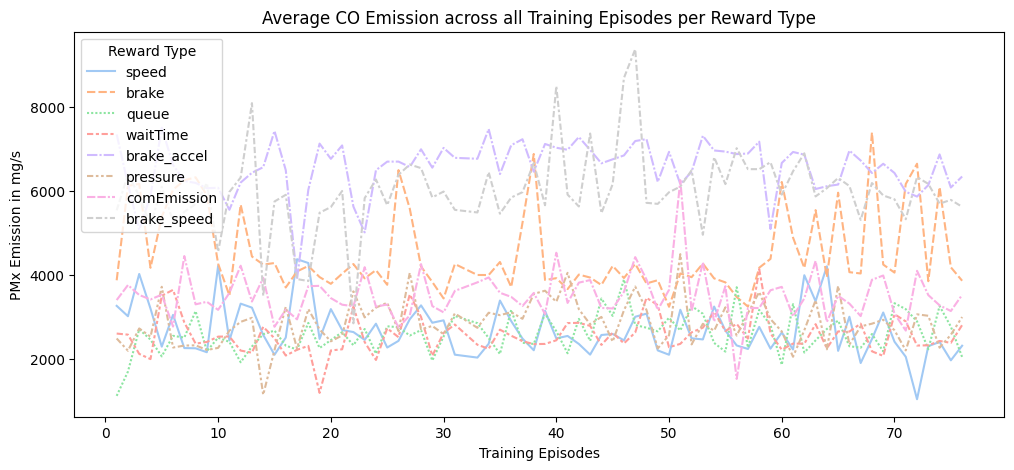

In [19]:
# plot with seaborn

plt.figure(figsize=(12,5))
ax = sns.lineplot(data=local_CO, palette='pastel')
ax.set_xlabel('Training Episodes')
ax.set_ylabel('PMx Emission in mg/s')
ax.set_title('Average CO Emission across all Training Episodes per Reward Type')
ax.legend(title='Reward Type', loc='upper left', fancybox=True)

##### PMx Comparison

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/3942395726.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_PMx['speed'] = df_speed.groupby('episode').mean()['system_local_PMx']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/3942395726.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_PMx['brake'] = df_brake.groupby('episode').mean()['system_local_PMx']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/3942395726.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only w

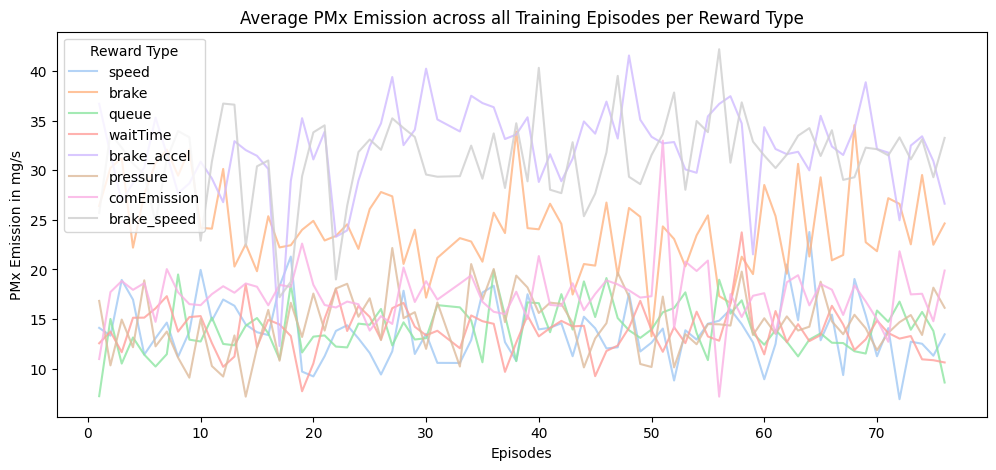

In [62]:
# new dataframe with local emissions for each reward type 

local_PMx = pd.DataFrame()

local_PMx['speed'] = df_speed.groupby('episode').mean()['system_local_PMx']
local_PMx['brake'] = df_brake.groupby('episode').mean()['system_local_PMx']
local_PMx['queue'] = df_queue.groupby('episode').mean()['system_local_PMx']
local_PMx['waitTime'] = df_waitTime.groupby('episode').mean()['system_local_PMx']
local_PMx['brake_accel'] = df_brake_accel.groupby('episode').mean()['system_local_PMx']
local_PMx['pressure'] = df_pressure.groupby('episode').mean()['system_local_PMx']
local_PMx['comEmission'] = df_combinedEmission.groupby('episode').mean()['system_local_PMx']
local_PMx['brake_speed'] = df_brake_speed.groupby('episode').mean()['system_local_PMx']

local_PMx.dropna(inplace=True) # drop empty episodes after 76

# get average CO2 emission across all episodes plot local CO2 emission for entire training process for each reward type in one figure
plt.figure(figsize=(12,5))

for column in local_PMx.columns:
       plt.plot(local_PMx.index, local_PMx[column], label=column, alpha=0.8)
       
plt.xlabel('Episodes')
plt.ylabel('PMx Emission in mg/s')  
plt.legend(title='Reward Type', fancybox=True, loc='upper left')
plt.title('Average PMx Emission across all Training Episodes per Reward Type')
plt.show()

In [21]:
# get mean of each reward types' average since the plots still overlap too much for clear identification

local_PMx.mean().sort_values()

waitTime       13.839974
speed          13.877447
queue          14.026544
pressure       14.637440
comEmission    17.441709
brake          24.239544
brake_speed    31.124407
brake_accel    32.110573
dtype: float64

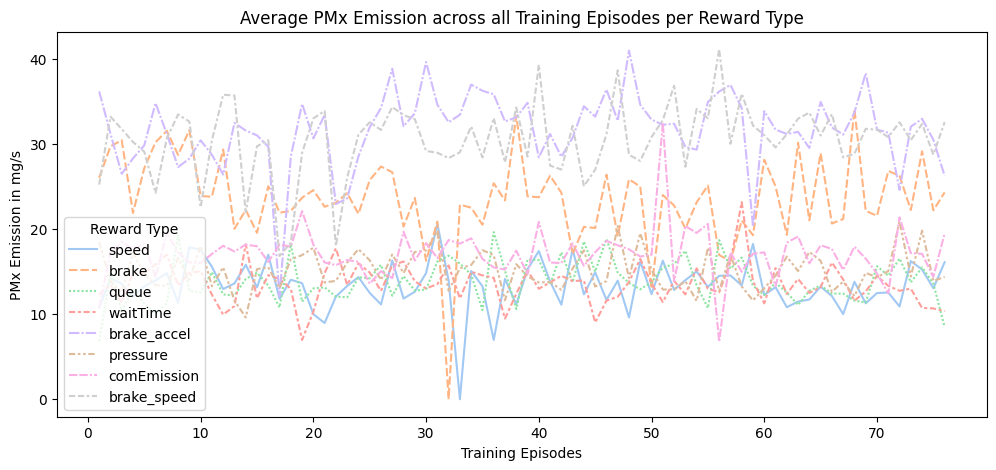

In [34]:
# plot with seaborn

plt.figure(figsize=(12,5))
ax = sns.lineplot(data=local_PMx, palette='pastel')
ax.set_xlabel('Training Episodes')
ax.set_ylabel('PMx Emission in mg/s')
ax.set_title('Average PMx Emission across all Training Episodes per Reward Type')
ax.legend(title='Reward Type', loc='lower left', fancybox=True)

##### NOx Comparison

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/3337849722.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_NOx['speed'] = df_speed.groupby('episode').mean()['system_local_NOx']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/3337849722.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_NOx['brake'] = df_brake.groupby('episode').mean()['system_local_NOx']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/3337849722.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only w

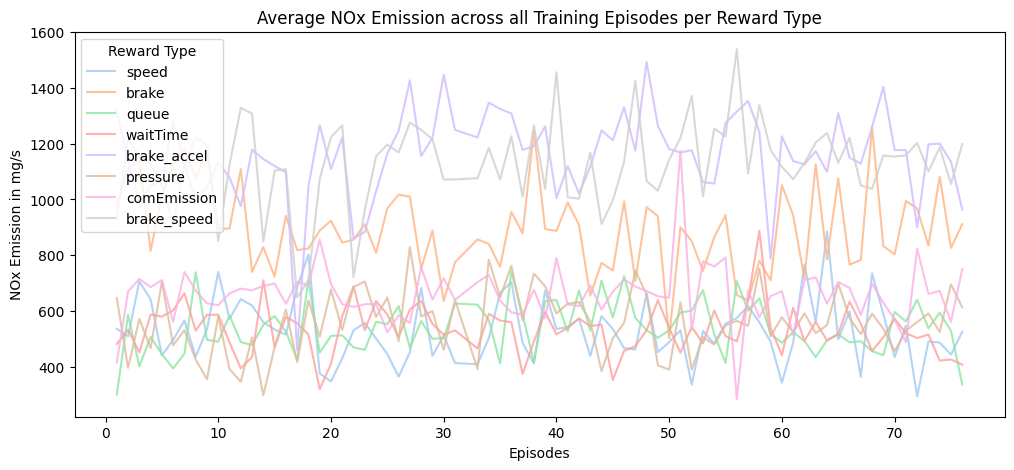

speed           531.750723
waitTime        532.944362
queue           537.696886
pressure        559.368429
comEmission     659.441512
brake           893.722701
brake_speed    1126.593442
brake_accel    1156.628491
dtype: float64


In [63]:
# new dataframe with local emissions for each reward type 

local_NOx = pd.DataFrame()

local_NOx['speed'] = df_speed.groupby('episode').mean()['system_local_NOx']
local_NOx['brake'] = df_brake.groupby('episode').mean()['system_local_NOx']
local_NOx['queue'] = df_queue.groupby('episode').mean()['system_local_NOx']
local_NOx['waitTime'] = df_waitTime.groupby('episode').mean()['system_local_NOx']
local_NOx['brake_accel'] = df_brake_accel.groupby('episode').mean()['system_local_NOx']
local_NOx['pressure'] = df_pressure.groupby('episode').mean()['system_local_NOx']
local_NOx['comEmission'] = df_combinedEmission.groupby('episode').mean()['system_local_NOx']
local_NOx['brake_speed'] = df_brake_speed.groupby('episode').mean()['system_local_NOx']

local_NOx.dropna(inplace=True) # drop empty episodes after 76

# get average CO2 emission across all episodes plot local CO2 emission for entire training process for each reward type in one figure
plt.figure(figsize=(12,5))

for column in local_NOx.columns:
       plt.plot(local_NOx.index, local_NOx[column], label=column, alpha=0.8)
       
plt.xlabel('Episodes')
plt.ylabel('NOx Emission in mg/s')  
plt.legend(title='Reward Type', fancybox=True ,loc='upper left')
plt.title('Average NOx Emission across all Training Episodes per Reward Type')
plt.show()


# get mean of each reward types' average since the plots still overlap too much for clear identification
print(local_NOx.mean().sort_values())

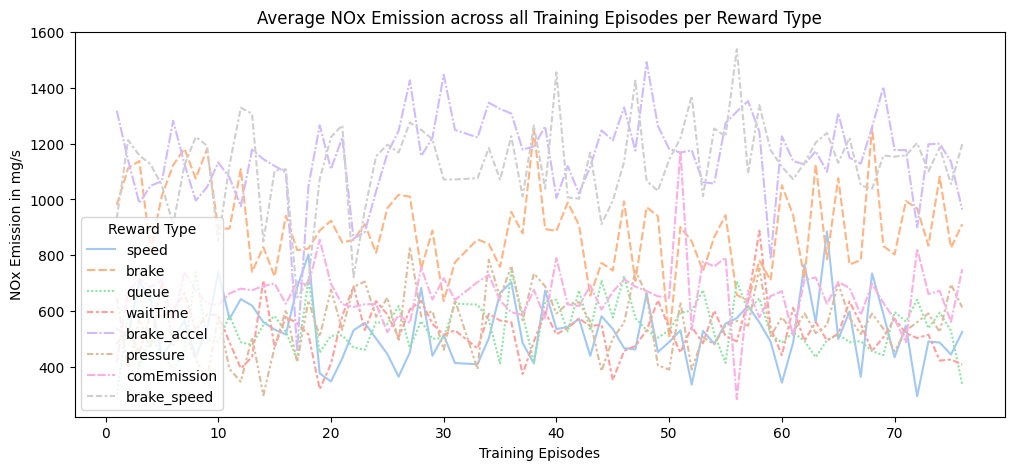

In [52]:
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=local_NOx, palette='pastel')
ax.set_xlabel('Training Episodes')
ax.set_ylabel('NOx Emission in mg/s')
ax.set_title('Average NOx Emission across all Training Episodes per Reward Type')
ax.legend(title='Reward Type', loc='lower left', fancybox=True)

##### HC Comparison

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/2231172147.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_HC['speed'] = df_speed.groupby('episode').mean()['system_local_HC']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/2231172147.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  local_HC['brake'] = df_brake.groupby('episode').mean()['system_local_HC']
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/2231172147.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will 

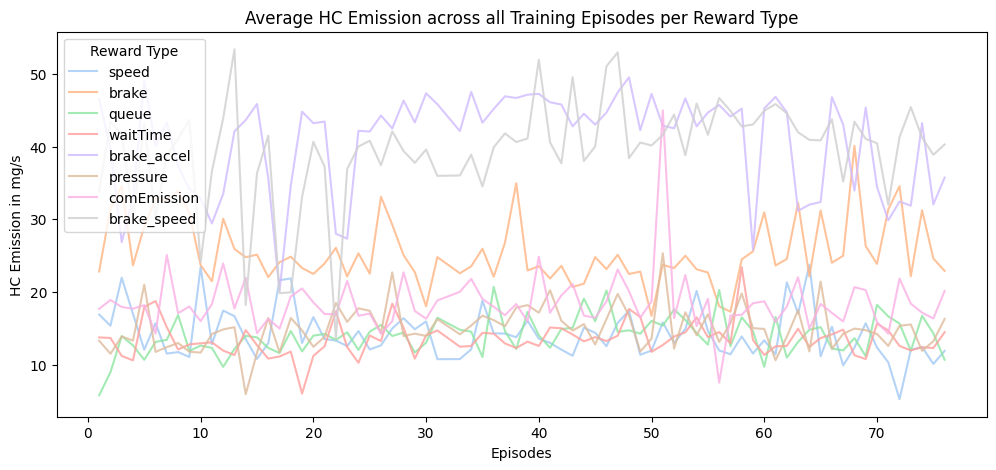

waitTime       13.499651
queue          13.979002
speed          14.210188
pressure       15.037467
comEmission    18.489402
brake          25.469207
brake_speed    39.461898
brake_accel    40.650226
dtype: float64


In [64]:
# new dataframe with local emissions for each reward type 

local_HC = pd.DataFrame()

local_HC['speed'] = df_speed.groupby('episode').mean()['system_local_HC']
local_HC['brake'] = df_brake.groupby('episode').mean()['system_local_HC']
local_HC['queue'] = df_queue.groupby('episode').mean()['system_local_HC']
local_HC['waitTime'] = df_waitTime.groupby('episode').mean()['system_local_HC']
local_HC['brake_accel'] = df_brake_accel.groupby('episode').mean()['system_local_HC']
local_HC['pressure'] = df_pressure.groupby('episode').mean()['system_local_HC']
local_HC['comEmission'] = df_combinedEmission.groupby('episode').mean()['system_local_HC']
local_HC['brake_speed'] = df_brake_speed.groupby('episode').mean()['system_local_HC']

local_HC.dropna(inplace=True) # drop episodes that are empty for some reward types

# get average HC emission across all episodes plot local HC emission for entire training process for each reward type in one figure

plt.figure(figsize=(12,5))

for column in local_HC.columns:
       plt.plot(local_HC.index, local_HC[column], label=column, alpha=0.8) 
       
plt.xlabel('Episodes')
plt.ylabel('HC Emission in mg/s')  
plt.legend(title='Reward Type', fancybox=True, loc='upper left')
plt.title('Average HC Emission across all Training Episodes per Reward Type')
plt.show()

# get mean of each reward types' average since the plots still overlap too much for clear identification

print(local_HC.mean().sort_values())

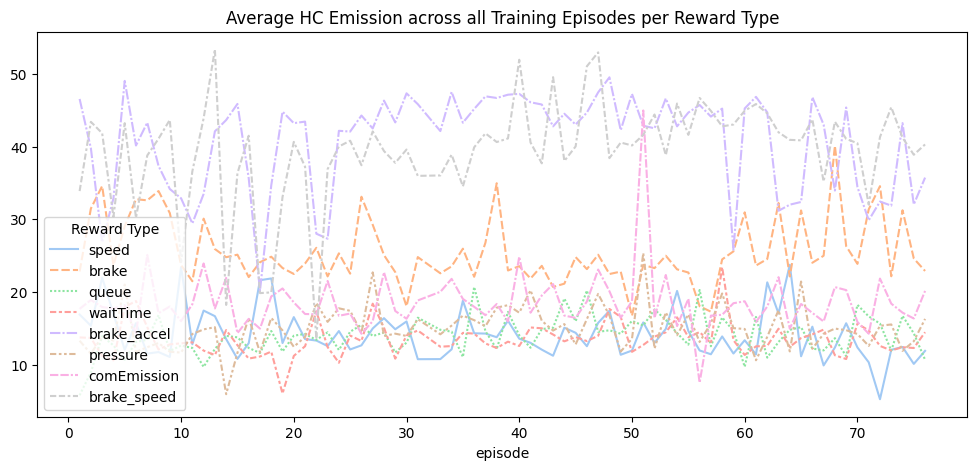

In [65]:
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=local_HC, palette='pastel')

ax.set_title('Average HC Emission across all Training Episodes per Reward Type')
ax.legend(title='Reward Type', loc='lower left', fancybox=True)

### Emission and Reward Relationship

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/100938771.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('episode').mean().reset_index()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/100938771.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('episode').mean().reset_index()
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/100938771.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify num

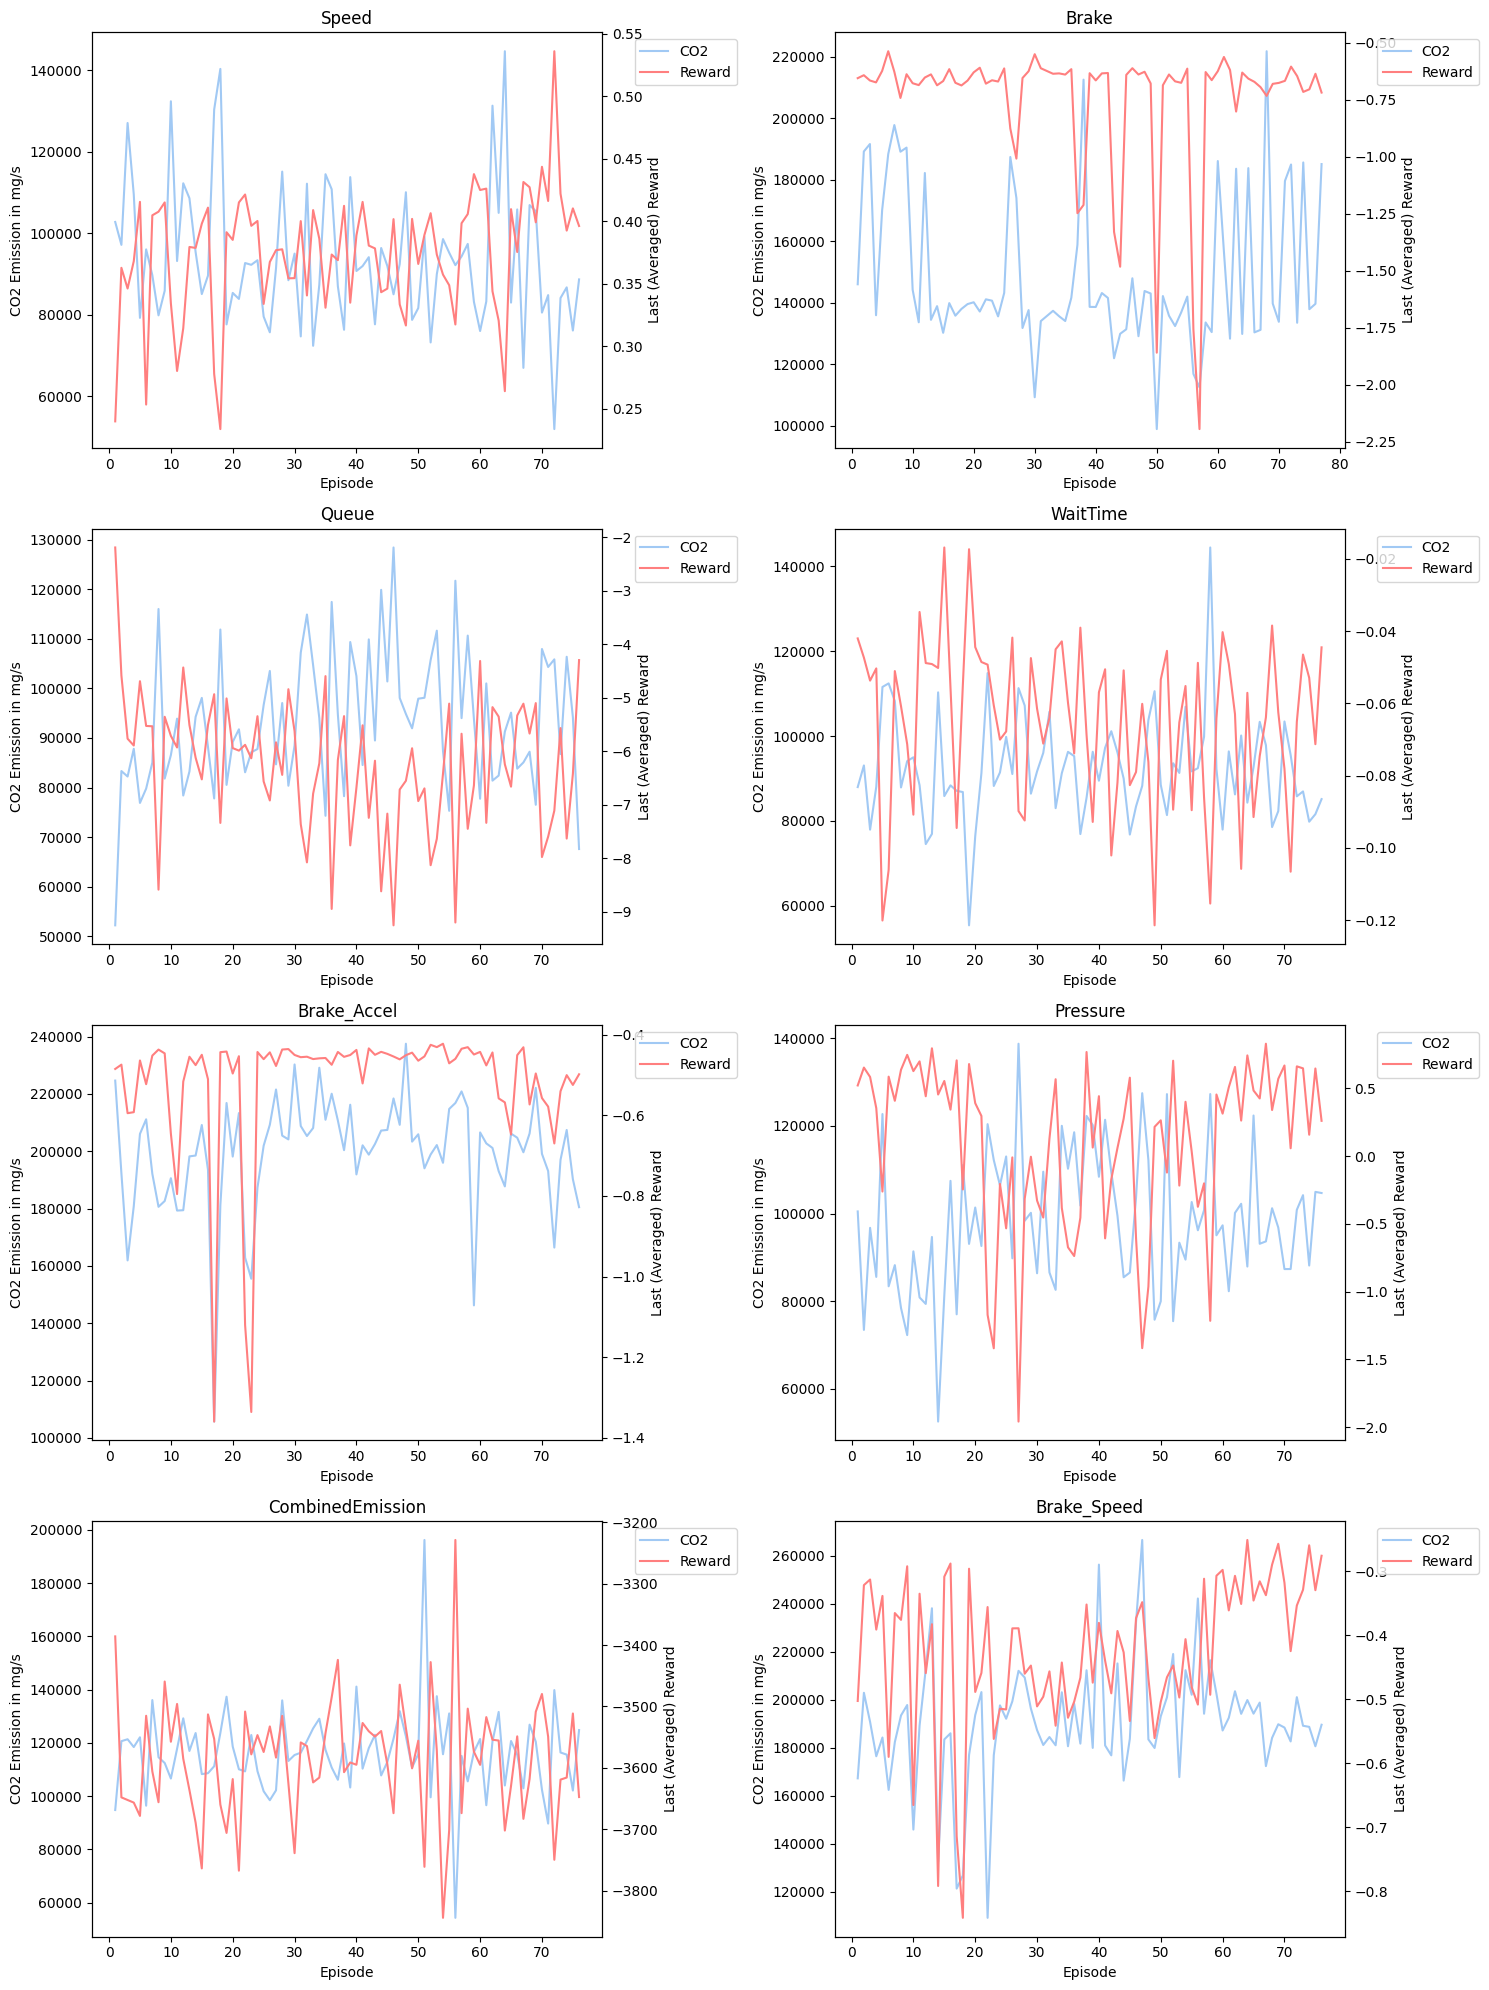

In [27]:
# List of dataframes and their names
dfs = [(df_speed, 'Speed'), (df_brake, 'Brake'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime'), 
       (df_brake_accel, 'Brake_Accel'), (df_pressure, 'Pressure'), 
       (df_combinedEmission, 'CombinedEmission'), (df_brake_speed, 'Brake_Speed')]


fig, axs = plt.subplots(4, 2, figsize=(15, 20))

sns.set_palette("pastel")

# Iterate over the list of dataframes
for i, (df, name) in enumerate(dfs):
    # Group by episode and calculate the mean
    df_grouped = df.groupby('episode').mean().reset_index()

    # Create a subplot
    ax = axs[i//2, i%2]
    
    sns.lineplot(x='episode', y='system_local_CO2', data=df_grouped, ax=ax)
    ax2 = ax.twinx()
    sns.lineplot(x='episode', y='system_last_reward', data=df_grouped, ax=ax2, color='#ff7f7f')

    ax.set_xlabel('Episode')
    ax.set_ylabel('CO2 Emission in mg/s')
    ax2.set_ylabel('Last (Averaged) Reward')
    ax.set_title(name)
    
    co2_line = mlines.Line2D([], [], color=sns.color_palette("pastel")[0], label='CO2')
    reward_line = mlines.Line2D([], [], color='#ff7f7f', label='Reward')
    ax2.legend(handles=[co2_line, reward_line], loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


### Best and Worst Episodes

In [66]:
# get episodes with highest and lowest reward for each reward type

# get average highest

df_speed.groupby('episode').mean()['system_last_reward'].sort_values()#.max()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/407404027.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_speed.groupby('episode').mean()['system_last_reward'].sort_values()#.max()


episode
18    0.233935
1     0.240096
6     0.253534
64    0.264214
17    0.277962
        ...   
68    0.427190
67    0.431364
59    0.437651
70    0.443498
72    0.535844
Name: system_last_reward, Length: 76, dtype: float64

In [68]:
df_speed[df_speed['episode'] == 72|73]

step  system_total_stopped  system_total_waiting_time  \
64200  25260.0                     0                        0.0   
64201  25265.0                     1                        1.0   
64202  25270.0                     1                        6.0   
64205  25285.0                     0                        0.0   
64206  25290.0                     0                        0.0   
...        ...                   ...                        ...   
65084  29680.0                     0                     4266.0   
65085  29685.0                     0                     4365.0   
65086  29690.0                     1                     4474.0   
65087  29695.0                     0                     4455.0   
65088  29700.0                     1                     4303.0   

       system_mean_waiting_time  system_mean_speed  system_total_CO2  \
64200                  0.000000          11.608878      3.874198e+05   
64201                  0.023256           0.050638      4.958768e+05   
64202                  0.139535           0.000000      4.836004e+05   
64205                  0.000000           7.339628      5.610227e+05   
64206                  0.000000          11.707905      6.773868e+05   
...                         ...                ...               ...   
65084                 99.209302          12.701464      6.188969e+06   
65085                101.511628           4.453409      6.193058e+06   
65086                104.046512           0.001366      5.984492e+06   
65087                103.604651           4.603346      5.855198e+06   
65088                100.069767           0.000000      5.914101e+06   

       system_total_PMx  system_total_NOx  system_total_noise_emission  \
64200         46.717518       2054.799644                  5033.535131   
64201         65.060259       2966.620457                  5479.816174   
64202         60.375092       2694.376420                  5808.107552   
64205         79.503381       3432.661491                  6899.224607   
64206         84.549698       3831.319356                  7372.759828   
...                 ...               ...                          ...   
65084        884.644898      36228.327774                 83292.668252   
65085        883.677884      36186.901698                 83075.652310   
65086        858.278472      34879.772787                 83004.404678   
65087        854.707032      34241.551459                 82656.699879   
65088        868.955844      34781.665339                 82578.057019   

       system_local_CO2  system_local_CO  system_local_HC  system_local_PMx  \
64200      13054.262914        20.605153         0.000000          2.596753   
64201       7368.125069        15.182258         0.000000          2.206094   
64202       7380.555556        15.200000         0.000000          2.208889   
64205      27214.748164        36.673709         0.000000          4.414962   
64206      11120.134497        18.447955         0.000000          2.360791   
...                 ...              ...              ...               ...   
65084     152844.002092      2704.015327        12.579606         23.898360   
65085      98321.513835      2803.826448        13.377484         16.594007   
65086     138724.340903      2778.671183        12.920585         24.129513   
65087     138158.898579      2899.212892        13.578361         22.369228   
65088     112447.359061      2711.773634        12.803394         18.275470   

       system_local_NOx  system_local_noise_emission  system_local_#vehicles  \
64200        115.702272                    74.122497                     1.0   
64201         84.732841                    65.043562                     1.0   
64202         84.888889                    67.110671                     1.0   
64205        231.297497                    76.913604                     1.0   
64206        100.476979                    73.853762                     1.0   
...                 ..

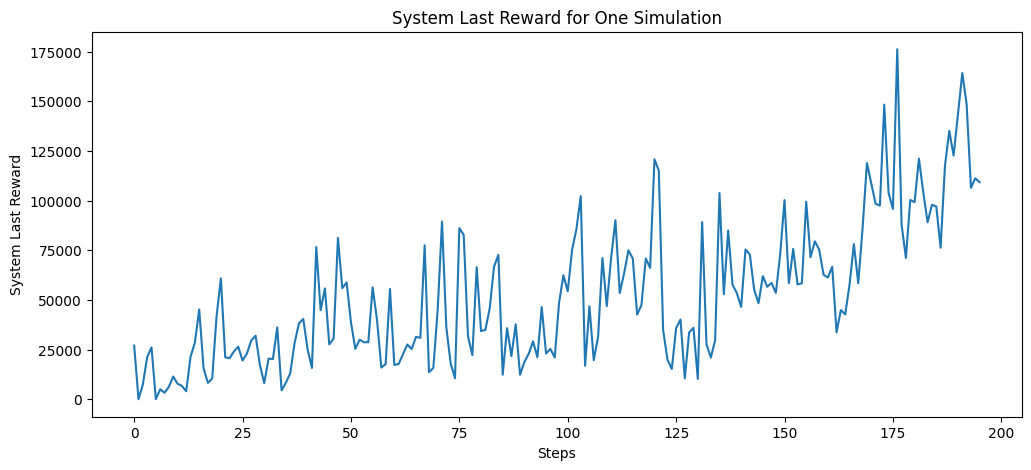

In [69]:
# get values for episode 72 

df_speed[df_speed['episode'] == 72].describe()

# plot system last reward for episode 72

episode72 = df_speed[df_speed['episode'] == 72].reset_index()

plt.figure(figsize=(12,5))

#TODO second axis

#plt.plot(episode72.index, episode72['system_last_reward'], label='system_last_reward', color='#ff7f7f')
plt.plot(episode72.index, episode72['system_local_CO2'], label='CO2', color='#1f77b4')
    
plt.xlabel('Steps')
plt.ylabel('System Last Reward')
plt.title('System Last Reward for One Simulation')
plt.show()

In [ ]:
# Plot the average CO2 emissions for each episode
plt.figure(figsize=(40, 20))
fig, ax1 = plt.subplots()

# Plot CO2 emissions on primary y-axis
ax1.plot(range(1, len(avg_co2_emissions_159) + 1), avg_co2_emissions_159, alpha=0.5, label='tls_159')
ax1.plot(range(1, len(avg_co2_emissions_160) + 1), avg_co2_emissions_160, alpha=0.5, label='tls_160')
ax1.plot(range(1, len(avg_co2_emissions_161) + 1), avg_co2_emissions_161, alpha=0.5, label='tls_161')

# Labels for first graph
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average CO2 (g)')
ax1.legend(['tls_159', 'tls_160', 'tls_161'])

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot system_last_reward on secondary y-axis
ax2.plot(avg_sys_last_reward, color='purple', linestyle='--', alpha=0.5, label='system_last_reward')

# Label for second graph
ax2.set_ylabel('Average System Reward')
ax2.legend(loc='upper right')

plt.show()

In [32]:
pd.set_option('display.max_columns', None)

In [34]:
# get total highest reward

df_speed[(df_speed['system_last_reward'] == df_speed['system_last_reward'].max())]

step  system_total_stopped  system_total_waiting_time  \
20742  25295.0                     0                        0.0   

       system_mean_waiting_time  system_mean_speed  system_total_CO2  \
20742                       0.0          13.480496      697837.80623   

       system_total_PMx  system_total_NOx  system_total_noise_emission  \
20742         82.722042        3702.26176                  7897.707238   

       system_local_CO2  system_local_CO  system_local_HC  system_local_PMx  \
20742      25952.926113        34.795078              0.0          4.105622   

       system_local_NOx  system_local_noise_emission  system_local_#vehicles  \
20742        214.292443                    77.232676                     1.0   

           system_local_avgSpeedsperType system_local_veh_types  \
20742  {'truck_truck': 13.4804956682007}          ['truck3602']   

       system_local_avg_speed  system_last_reward  \
20742                9.682105            0.999972   

       total_brake_traffic_signals  local_acceleration  tls_159_stopped  \
20742                          0.0            0.453194                0   

       tls_159_accumulated_waiting_time  tls_159_average_speed  \
20742                               2.0               0.999916   

       tls_159_braking  tls_159_acceleration  \
20742              0.0              0.453194   

                        tls_159_controlled_lane_emission  tls_159_phase  \
20742  {'CO2_emission': 51905.852225007184, 'CO_emiss...              0   

              tls_159_state  tls_159_reward  tls_160_stopped  \
20742  GGGgrrrrrrgGgGGrrrrr        0.999916                0   

       tls_160_accumulated_waiting_time  tls_160_average_speed  \
20742                               0.0                    1.0   

       tls_160_braking  tls_160_acceleration tls_160_controlled_lane_emission  \
20742              0.0                   0.0                               []   

       tls_160_phase            tls_160_state  tls_160_reward  \
20742              0  rgGgGrrrrrrrrrrrrrrrrrr             1.0   

       tls_161_stopped  tls_161_accumulated_waiting_time  \
20742                0                               0.0   

       tls_161_average_speed  tls_161_braking  tls_161_acceleration  \
20742                    1.0              0.0                   0.0   

      tls_161_controlled_lane_emission  tls_161_phase  \
20742                               []              0   

                 tls_161_state  tls_161_reward  agents_total_stopped  \
20742  ggggggggggrrggggggggggg             1.0                     0   

       agents_total_accumulated_waiting_time  episode  
20742                                    2.0       24

In [317]:
brakeAccel = pd.DataFrame()
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_speed
    if file.startswith('avg_brake_NEW'):
        temp_df_ba = pd.read_csv(os.path.join(inputdir, file))
        temp_df_ba['episode'] = i_speed # add episode column
        brakeAccel = brakeAccel.append(temp_df_ba, ignore_index=True)
        i_speed += 1

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/2332994737.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  brakeAccel = brakeAccel.append(temp_df_ba, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/2332994737.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  brakeAccel = brakeAccel.append(temp_df_ba, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/2332994737.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  brakeAccel = brakeAccel.append(temp_df_ba, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_29567/2332994737.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pan

In [318]:
brakeAccel[['system_local_CO2', 'system_local_CO', 'system_local_PMx','system_local_NOx', 'system_local_HC']].describe()

system_local_CO2  system_local_CO  system_local_PMx  system_local_NOx  \
count      67792.000000     67792.000000      67792.000000      67792.000000   
mean      188007.675749      6038.940322         30.320436       1113.074895   
std        62027.269709      1989.132137         11.624510        429.850184   
min            0.000000         0.000000          0.000000          0.000000   
25%       166837.944255      5479.553726         24.530083        892.669745   
50%       199576.666667      6342.597222         32.784928       1197.085825   
75%       226437.500000      7167.269444         37.940945       1388.899444   
max       408852.786508     13418.622838         69.447979       2678.412611   

       system_local_HC  
count     67792.000000  
mean         32.138571  
std          11.180085  
min           0.000000  
25%          27.841985  
50%          33.867777  
75%          39.361551  
max          72.739794

### Phase Transition Matrix

In [319]:
# Define the possible states for each traffic light
tls_159_states = ["GGGgrrrrrrgGgGGrrrGG",
        "GGGgrrrrrrgGgGGrrrrr",
        "yyygrrrrrryyyyyrrrrr",
        "GGGGrrrrrrrrrrrrrrrr",
        "yyyyrrrrrrrrrrrrrrrr",
        "rrrrgGGGrrrrrrrGGGrG",
        "rrrrgGGGrrrrrrrGrrrr",
        "rrrryyyyrrrrrrryrrrr",
        "rrrrrrrrggrrrrrrGGGr",
        "rrrrrrrrggrrrrrrrrrr",
        "rrrrrrrryyrrrrrrrrrr"]

tls_160_states = ["rgGgGrrrrrrrrrrrGGrGGrG",
        "rgGgGrrrrrrrrrrrrrrrrrr",
        "ryyyyrrrrrrrrrrrrrrrrrr",
        "rrrrrgrrrrrrggGGGGGrGGr",
        "rrrrrgrrrrrrggGGrrrrrrr",
        "rrrrryrrrrrryyyyrrrrrrr",
        "grrrrrGGgGGgrrrrrGGrrGG",
        "grrrrrGGgGGgrrrrrrrrrrr",
        "grrrrryyyyyyrrrrrrrrrrr",
        "Grrrrrrrrrrrrrrrrrrrrrr",
        "yrrrrrrrrrrrrrrrrrrrrrr"]

tls_161_states = ["yyyyyyryyyrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "ggggggggggrrggggggggggg",
        "rrrrrrryrryyrrrrrryyrrr",
        "rrrrrrrgrrggrrrrrrggrrr",
        "rrrrrrrrrrrrrrrrrryyrrr",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "yyyyyyyryyrrrrrrrrrrgrr",
        "gggggggrggrrrrrrrrrrgrr",
        "ggggggggggrrrrrrrrrrgry",
        "ggggggggggrrrrrrrrrrgrg",
        "ggggggyryyrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrry"]

In [118]:
num_states_tl1 = df_speed['tls_159_state'].value_counts().sort_index()
num_states_tl2 = df_speed['tls_160_state'].value_counts().sort_index()
num_states_tl3 = df_speed['tls_161_state'].value_counts().sort_index()


In [119]:
num_states_tl1

GGGGrrrrrrrrrrrrrrrr     2001
GGGgrrrrrrgGgGGrrrGG     1463
GGGgrrrrrrgGgGGrrrrr    41647
rrrrgGGGrrrrrrrGGGrG     1092
rrrrgGGGrrrrrrrGrrrr    17013
rrrrrrrrggrrrrrrGGGr     2464
rrrrrrrrggrrrrrrrrrr      622
Name: tls_159_state, dtype: int64

In [120]:
num_states_tl2

Grrrrrrrrrrrrrrrrrrrrrr      856
grrrrrGGgGGgrrrrrGGrrGG    17972
grrrrrGGgGGgrrrrrrrrrrr     6402
rgGgGrrrrrrrrrrrGGrGGrG     1990
rgGgGrrrrrrrrrrrrrrrrrr    26706
rrrrrgrrrrrrggGGGGGrGGr    10537
rrrrrgrrrrrrggGGrrrrrrr     1839
Name: tls_160_state, dtype: int64

In [121]:
num_states_tl3

ggggggggggrrggggggggggg    48663
ggggggggggrrrrrrrrrrgrg     5436
gggggggrggrrrrrrrrrrgrr     3280
rrrrrrrgrrggrrrrrrggrrr     8923
Name: tls_161_state, dtype: int64

In [198]:
tls_159_allStates = df_speed['tls_159_state'].tolist()
tls_159_allStates.append(x for x in tls_159_states if x not in tls_159_allStates)

In [172]:
df_speed['tls_159_state'].value_counts().sort_index()

GGGGrrrrrrrrrrrrrrrr     2001
GGGgrrrrrrgGgGGrrrGG     1463
GGGgrrrrrrgGgGGrrrrr    41647
rrrrgGGGrrrrrrrGGGrG     1092
rrrrgGGGrrrrrrrGrrrr    17013
rrrrrrrrggrrrrrrGGGr     2464
rrrrrrrrggrrrrrrrrrr      622
Name: tls_159_state, dtype: int64

In [168]:
def transition_matrix(transitions, num_phases):
    phases = list(set(phase for transition in transitions for phase in transition))
    phase_to_index = {phase: index for index, phase in enumerate(phases)}
    matrix = [[0] * num_phases for _ in range(num_phases)]
    for (phase1, phase2) in transitions:
        i = phase_to_index[phase1]
        j = phase_to_index[phase2]
        matrix[i][j] += 1
    return matrix


In [199]:
transitions = [(tls_159_allStates[i], tls_159_allStates[i+1]) for i in range(len(tls_159_allStates)-1)]

In [204]:
num_phases = 11
matrix = transition_matrix(transitions, num_phases)

In [173]:
def normalize_matrix(matrix):
        for row in matrix:
            total = sum(row)
            if total > 0:  # Avoid division by zero
                row[:] = [f/total for f in row]
        return matrix

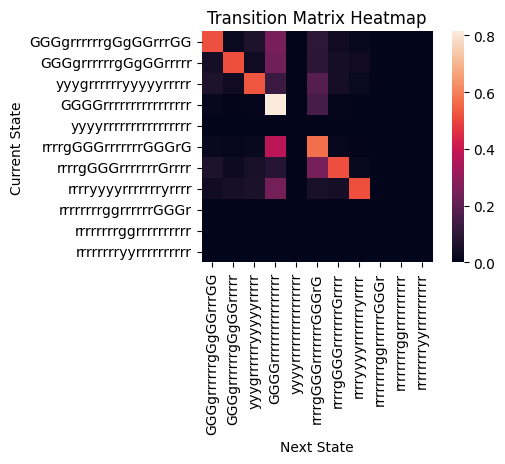

In [234]:
# create transition matrix and plot heatmap

def transition_matrix(transitions, num_phases):
    phases = list(set(phase for transition in transitions for phase in transition))
    phase_to_index = {phase: index for index, phase in enumerate(phases)}
    matrix = [[0] * num_phases for _ in range(num_phases)]
    for (phase1, phase2) in transitions:
        i = phase_to_index[phase1]
        j = phase_to_index[phase2]
        matrix[i][j] += 1
    return matrix

def normalize_matrix(matrix):
        for row in matrix:
            total = sum(row)
            if total > 0:  # Avoid division by zero
                row[:] = [f/total for f in row]
        return matrix

def create_heatmap(matrix, states):
    plt.figure(figsize=(5, 3))  # adjust the size as needed
    sns.heatmap(matrix,square=True, xticklabels=states, yticklabels=states)
    plt.xlabel("Next State")
    plt.ylabel("Current State")
    plt.title("Transition Matrix Heatmap")
    plt.show()

# append all states collected during training to list
tls_159_allStates = df_speed['tls_159_state'].tolist()
tls_159_allStates.append(x for x in tls_159_states if x not in tls_159_allStates)

# get number of distinct phases
num_phases = len(tls_159_states)

# create list of tuples for state transitions
transitions = [(tls_159_allStates[i], tls_159_allStates[i+1]) for i in range(len(tls_159_allStates)-1)]

# create transition matrix
matrix = transition_matrix(transitions, num_phases)

# normalize matrix
transition_matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

# plot heatmap
create_heatmap(transition_matrix, tls_159_states)

In [ ]:
tls_160_allStates = df_speed['tls_160_state'].tolist()

In [257]:
# define functions to call in plot_transition_matrix

def transition_matrix(transitions, num_phases):
    phases = list(set(phase for transition in transitions for phase in transition))
    phase_to_index = {phase: index for index, phase in enumerate(phases)}
    matrix = [[0] * num_phases for _ in range(num_phases)]
    for (phase1, phase2) in transitions:
        i = phase_to_index[phase1]
        j = phase_to_index[phase2]
        matrix[i][j] += 1
    return matrix

def normalize_matrix(matrix):
        for row in matrix:
            total = sum(row)
            if total > 0:  # Avoid division by zero
                row[:] = [f/total for f in row]
        return matrix

def create_heatmap(matrix, states):
    plt.figure(figsize=(5, 3))  # adjust the size as needed
    sns.heatmap(matrix,square=True, xticklabels=states, yticklabels=states)
    plt.xlabel("Next State")
    plt.ylabel("Current State")
    plt.title("Transition Matrix Heatmap")
    plt.show()

In [258]:
def plot_transition_matrix(dataframe, tls_column, tls_list):
    
    # append all states collected during training to list
    states = dataframe[tls_column].tolist()
    states.append(x for x in tls_list if x not in states)

    # get number of distinct phases
    num_phases = len(tls_list)

    # create list of tuples for state transitions
    transitions = [(states[i], states[i+1]) for i in range(len(states)-1)]

    # create transition matrix
    matrix = transition_matrix(transitions, num_phases)

    # normalize matrix
    matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

    # plot heatmap
    create_heatmap(transition_matrix, set(states))

In [265]:
df_1 = df_speed[df_speed['episode'] <= 25]
df_2 = df_speed[(df_speed['episode'] <= 50) & (df_speed['episode'] > 25)]
df_3 = df_speed[df_speed['episode'] > 50]

In [267]:
df_list = [df_1, df_2, df_3]

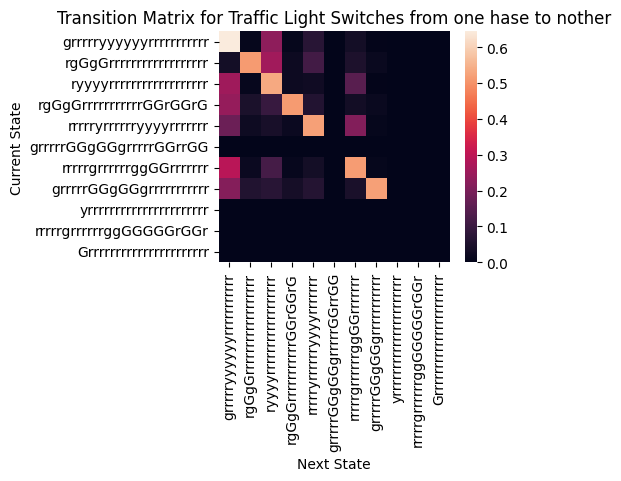

In [295]:
# create transition matrix and plot heatmap

def transition_matrix(transitions, num_phases):
    phases = list(set(phase for transition in transitions for phase in transition))
    phase_to_index = {phase: index for index, phase in enumerate(phases)}
    matrix = [[0] * num_phases for _ in range(num_phases)]
    for (phase1, phase2) in transitions:
        i = phase_to_index[phase1]
        j = phase_to_index[phase2]
        matrix[i][j] += 1
    return matrix

def normalize_matrix(matrix):
        for row in matrix:
            total = sum(row)
            if total > 0:  # Avoid division by zero
                row[:] = [f/total for f in row]
        return matrix

def create_heatmap(matrix, states):
    plt.figure(figsize=(4, 3))  # adjust the size as needed
    sns.heatmap(matrix,square=True, xticklabels=states, yticklabels=states)
    plt.xlabel("Next State")
    plt.ylabel("Current State")
    plt.title("Transition Matrix for Traffic Light Switches from one hase to nother")
    plt.show()

# append all states collected during training to list
tls_160_allStates = df_speed['tls_160_state'].tolist()
tls_160_allStates.append(x for x in set(tls_160_states) if x not in tls_160_allStates)

# get number of distinct phases
num_phases = len(set(tls_160_states))

# create list of tuples for state transitions
transitions = [(tls_160_allStates[i], tls_160_allStates[i+1]) for i in range(len(tls_160_allStates)-1)]

# create transition matrix
matrix = transition_matrix(transitions, num_phases)

# normalize matrix
transition_matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

# plot heatmap
create_heatmap(transition_matrix, set(tls_160_states))

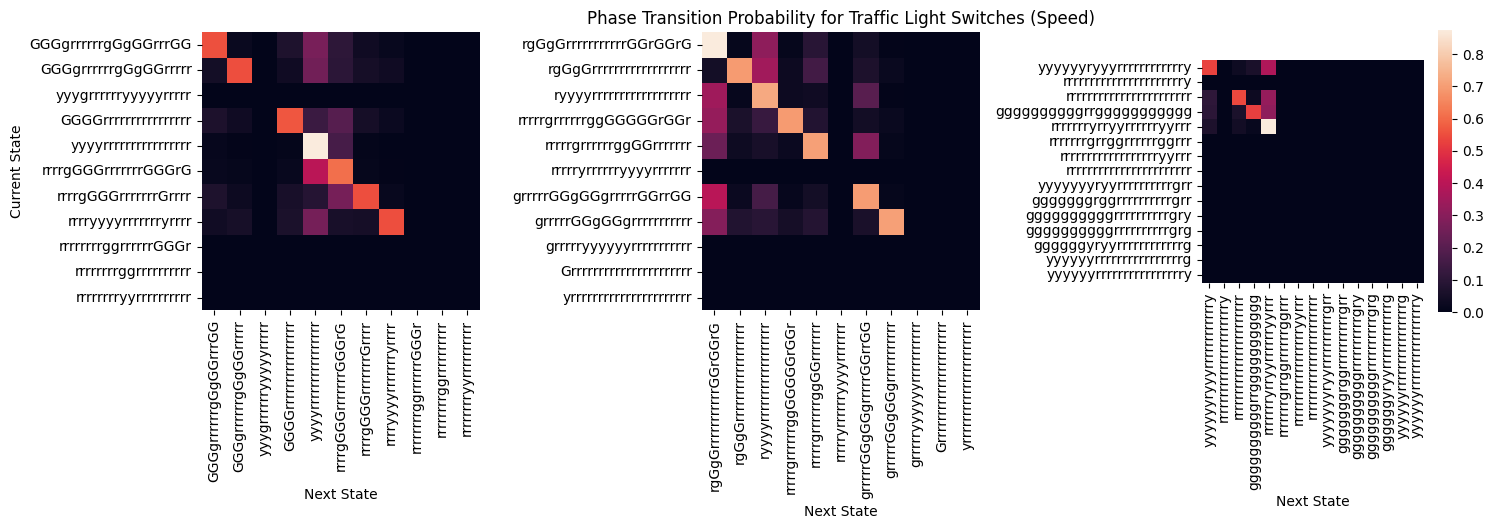

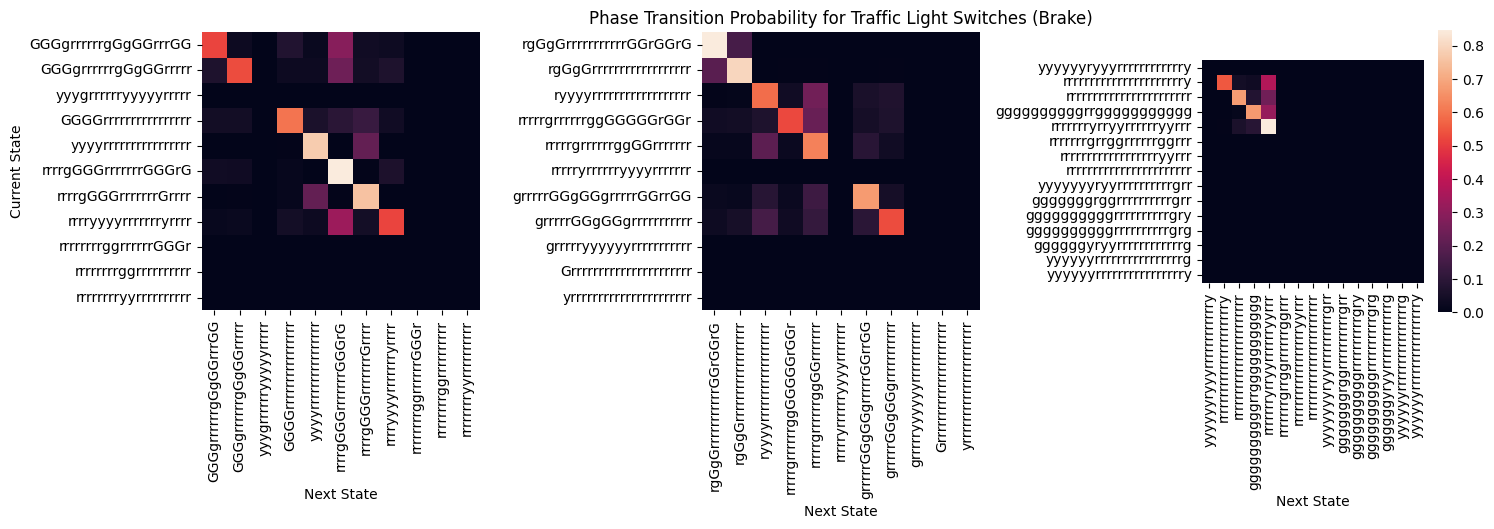

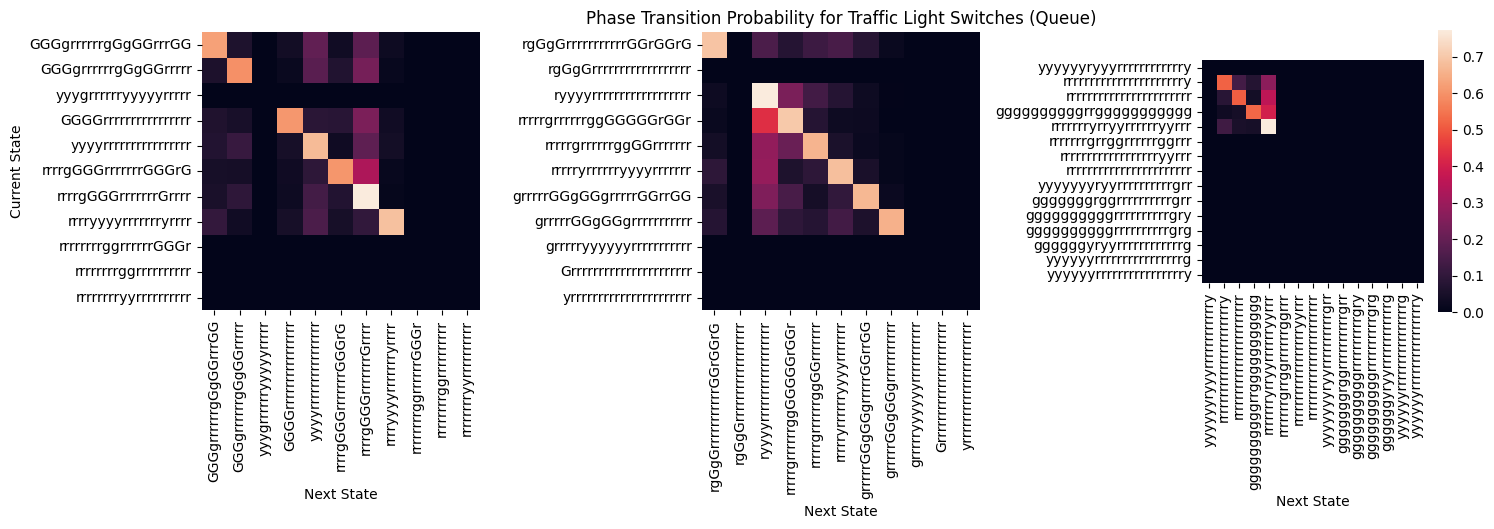

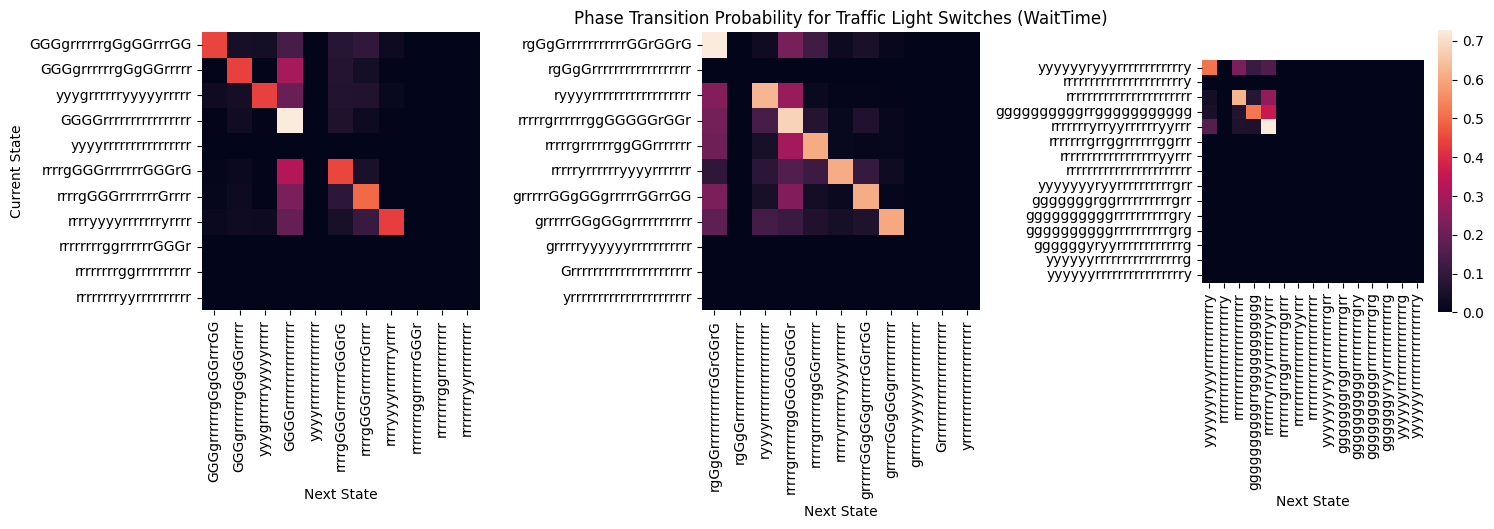

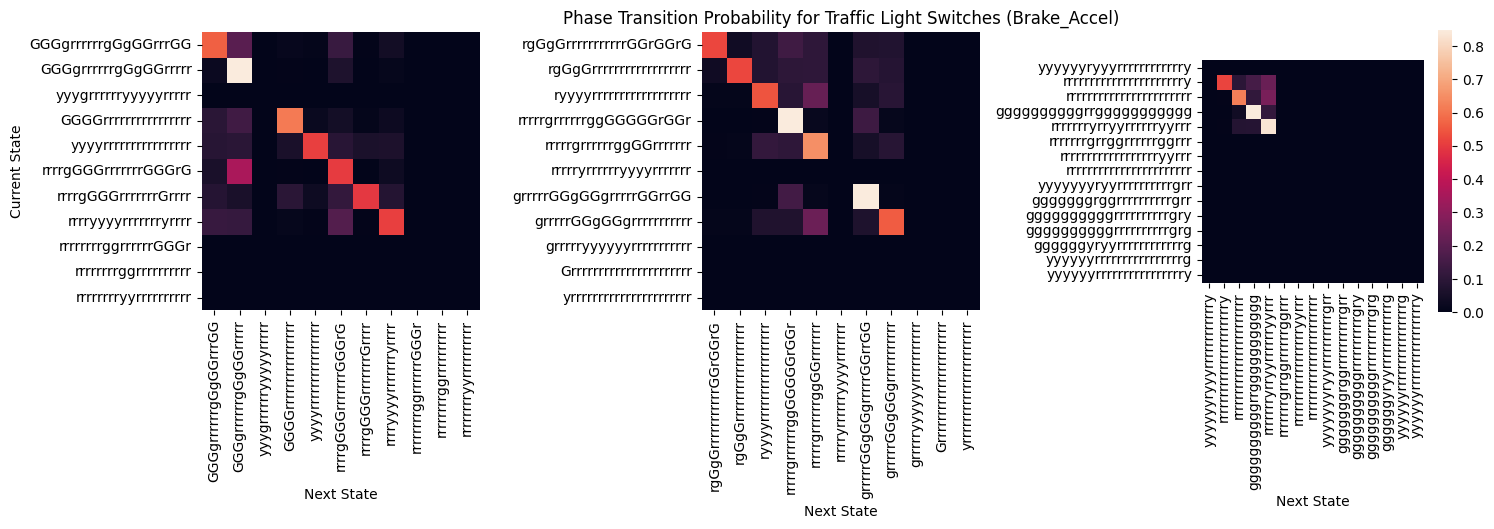

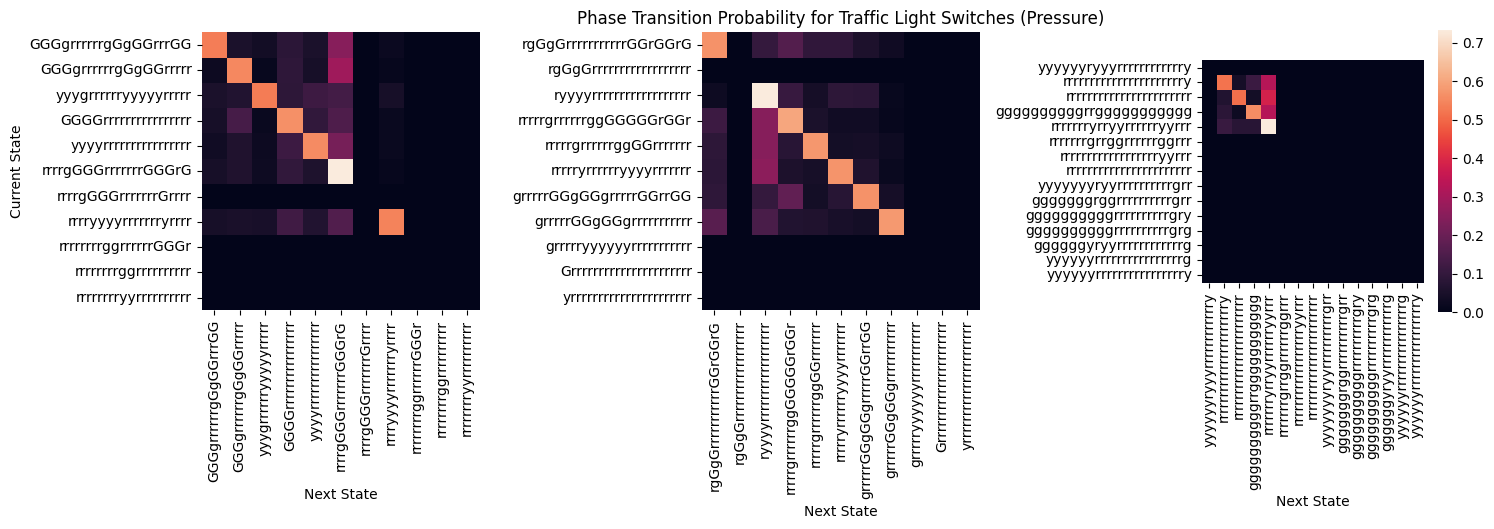

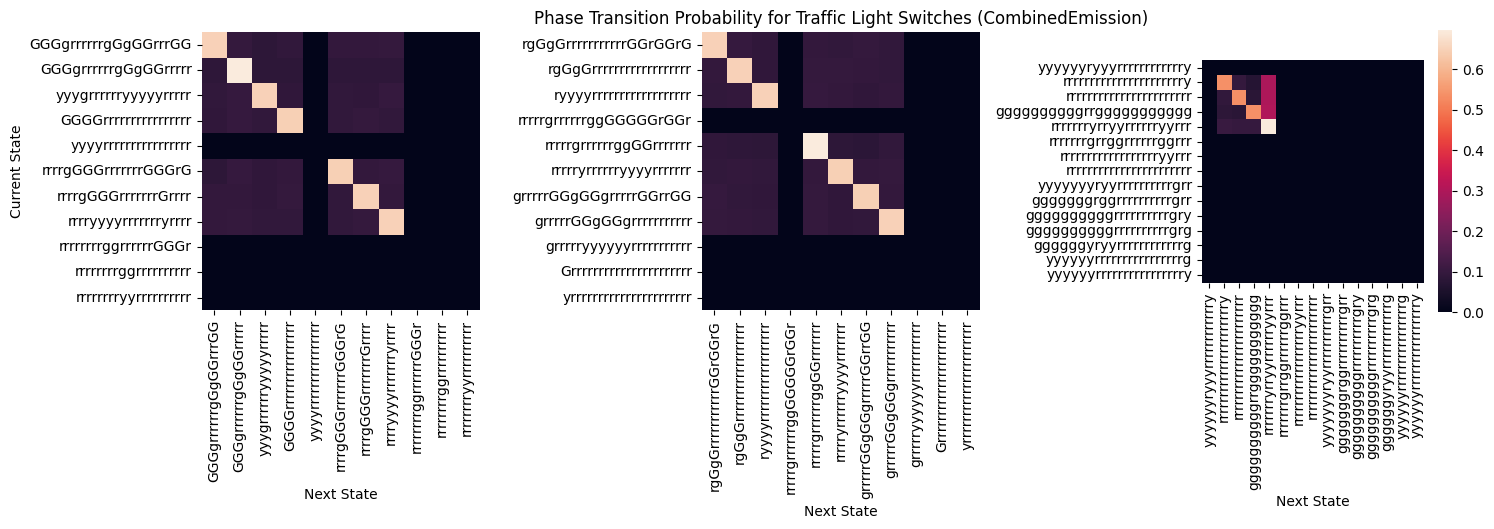

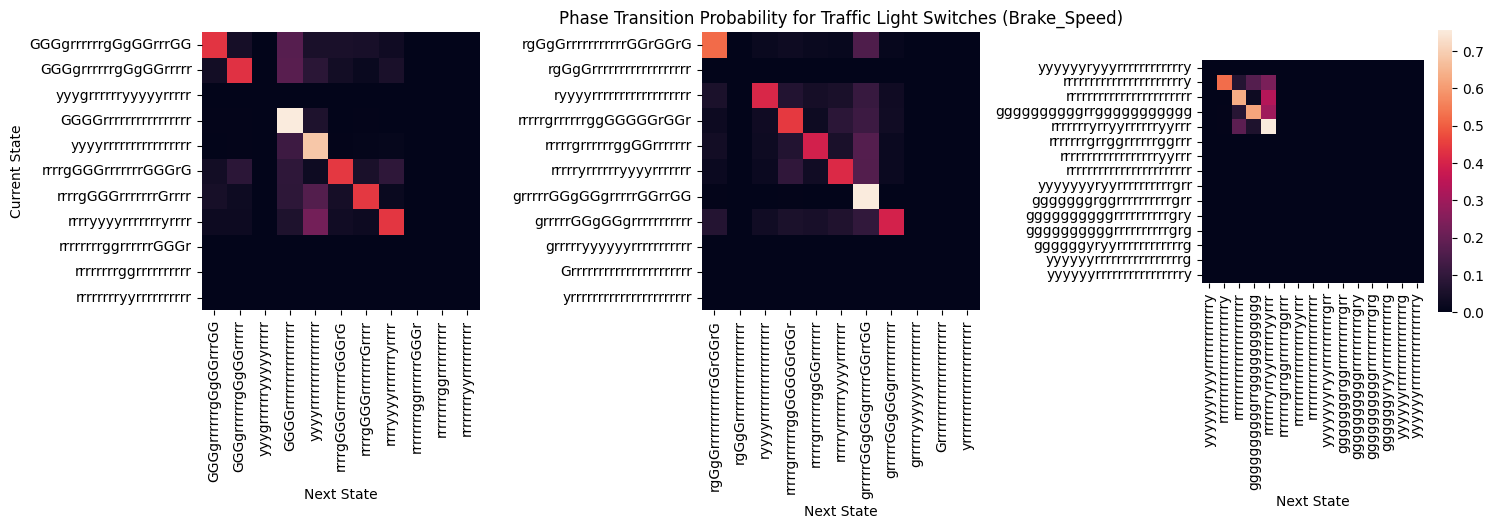

In [325]:
# Create a figure with subplots based on the number of dataframes
tls_list = ['tls_159_state', 'tls_160_state', 'tls_161_state'] # list of all possible states
unique_state_lists = [tls_159_states, tls_160_states, tls_161_states] # list of lists of unique states for each traffic light
df_list = [(df_speed, 'Speed'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime')]
    #    (df_brake_accel, 'Brake_Accel'), (df_pressure, 'Pressure'), (df_brake, 'Brake'), 
    #    (df_combinedEmission, 'CombinedEmission'), (df_brake_speed, 'Brake_Speed')] # list of dataframes


for (df, name) in df_list:
    j = 0
    num_dataframes = len(tls_list)
    fig, axs = plt.subplots(1, num_dataframes, figsize=(5*num_dataframes, 5))

    # Iterate over the dataframes and plot each one in a subplot
    for i, col in enumerate(tls_list):
        # create transition matrix and plot heatmap

        def transition_matrix(transitions, num_phases):
            phases = list(set(phase for transition in transitions for phase in transition))
            phase_to_index = {phase: index for index, phase in enumerate(phases)}
            matrix = [[0] * num_phases for _ in range(num_phases)]
            for (phase1, phase2) in transitions:
                i = phase_to_index[phase1]
                j = phase_to_index[phase2]
                matrix[i][j] += 1
            return matrix

        # def normalize_matrix(matrix):
        #     for row in matrix:
        #         total = sum(row)
        #         if total > 0:  # Avoid division by zero
        #             row[:] = [f/total for f in row]
        #     return matrix

        def normalize_matrix(matrix):
            normalized_matrix = []
            for row in matrix:
                row_sum = sum(row)
                if row_sum != 0:
                    normalized_row = [value / row_sum for value in row]
                else:
                    normalized_row = [0] * len(row)
                normalized_matrix.append(normalized_row)
            return normalized_matrix


        
        def create_heatmap(matrix, states, ax):
            sns.heatmap(matrix, square=True, xticklabels=unique_state_lists[j], yticklabels=unique_state_lists[j], ax=ax, cbar=i==num_dataframes-1, cbar_ax=None if i == num_dataframes-1 else False)
            ax.set_xlabel("Next State")
            ax.set_ylabel("Current State" if i == 0 else "")
            ax.set_title(f"Phase Transition Probability for Traffic Light Switches ({name})" if i == 1 else "")
            #ax.set_aspect("equal")

        # append all states collected during training to list
        tls_allStates = df[col].tolist()
        tls_allStates.append(x for x in unique_state_lists[j] if x not in tls_allStates)

        # get number of distinct phases
        num_phases = len(unique_state_lists[j])

        # create list of tuples for state transitions
        transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

        # create transition matrix
        matrix = transition_matrix(transitions, num_phases)
        #print(matrix)

        # normalize matrix
        transition_matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

        # plot heatmap in the corresponding subplot
        create_heatmap(transition_matrix, unique_state_lists[j], axs[i])
        
        j += 1

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()


# plot heatmap
#create_heatmap(transition_matrix, set(tls_160_states))

InvalidIndexError: (          step  system_total_stopped  system_total_waiting_time  \
12     25260.0                     0                        0.0   
13     25265.0                     1                        3.0   
14     25270.0                     1                        8.0   
15     25275.0                     1                       13.0   
16     25280.0                     1                       18.0   
...        ...                   ...                        ...   
67787  29680.0                     1                     5540.0   
67788  29685.0                     1                     5763.0   
67789  29690.0                     1                     5990.0   
67790  29695.0                     1                     6209.0   
67791  29700.0                     1                     6406.0   

       system_mean_waiting_time  system_mean_speed  system_total_CO2  \
12                     0.000000          11.166141      3.373321e+05   
13                     0.069767           0.001086      4.525986e+05   
14                     0.186047           0.000000      4.986223e+05   
15                     0.302326           0.000000      4.675401e+05   
16                     0.418605           0.000000      4.722311e+05   
...                         ...                ...               ...   
67787                128.837209           0.000000      4.910090e+06   
67788                134.023256           0.000000      4.970423e+06   
67789                139.302326           0.000000      4.978143e+06   
67790                144.395349           0.000000      4.706237e+06   
67791                148.976744           0.000000      4.693201e+06   

       system_total_PMx  system_total_NOx  system_total_noise_emission  \
12            43.097786       1837.223199                  5047.502866   
13            59.569371       2699.955646                  5464.746492   
14            62.918110       2803.240841                  5769.444702   
15            59.578226       2630.446601                  6178.673967   
16            64.497998       2770.143984                  6532.292400   
...                 ...               ...                          ...   
67787        696.249075      28581.157973                 66758.624778   
67788        712.914840      29355.353118                 66460.901159   
67789        705.765215      29056.861017                 66607.368079   
67790        675.153668      27314.362433                 66467.797153   
67791        670.060404      26879.186165                 66498.802368   

       system_local_CO2  system_local_CO  system_local_HC  system_local_PMx  \
12             0.000000         0.000000         0.000000          0.000000   
13          7381.081635        15.200500         0.000000          2.208925   
14          7380.555556        15.200000         0.000000          2.208889   
15          7380.555556        15.200000         0.000000          2.208889   
16          7380.555556        15.200000         0.000000          2.208889   
...                 ...              ...              ...               ...   
67787     176332.341251      5155.772494        24.223563         30.796211   
67788     184961.292641      5570.998603        26.356883         31.047894   
67789     195855.794578      6154.392751        29.039930         33.330392   
67790     203798.675423      6023.115345        28.608777         33.470877   
67791     220309.990430      5426.408835        25.390998         39.017547   

       system_local_NOx  system_local_noise_emission  system_local_#vehicles  \
12             0.000000                    69.591722                     1.0   
13            84.891735                    67.104376                     1.0   
14            84.888889                    67.110671                     1.0   
15            84.888889                    67.110671                     1.0   
16            84.888889                    67.110671                     1.0   
...                 ...                          ...                     ...   
67787       1139.504084                   343.814746                    47.0   
67788       1143.861557                   459.572421                    53.0   
67789       1226.520929                   397.945584                    52.0   
67790       1233.597577                   672.432913                    55.0   
67791       1495.024329                   548.206547                    53.0   

                           system_local_avgSpeedsperType  \
12                   {'truck_truck': 11.166140948694661}   
13                {'truck_truck': 0.0010856229315041955}   
14                                  {'truck_truck': 0.0}   
15                                  {'truck_truck': 0.0}   
16                                  {'truck_truck': 0.0}   
...                                                  ...   
67787  {'tram': 0.0, 'truck_truck': 0.0, 'DEFAULT_VEH...   
67788  {'truck_truck': 0.0, 'tram': 0.0, 'DEFAULT_VEH...   
67789  {'tram': 0.0, 'truck_truck': 0.0, 'DEFAULT_VEH...   
67790  {'tram': 0.0, 'truck_truck': 0.0, 'DEFAULT_VEH...   
67791  {'tram': 0.0, 'truck_truck': 0.0, 'DEFAULT_VEH...   

                                  system_local_veh_types  \
12                                         ['truck3602']   
13                                         ['truck3602']   
14                                         ['truck3602']   
15                                         ['truck3602']   
16                                         ['truck3602']   
...                                                  ...   
67787  ['7-2-1007-27840.0', 'truck4992', 'veh18451', ...   
67788  ['truck5058', '14-202-3-29460.0', '7-2-1007-27...   
67789  ['14-202-3-29460.0', '7-2-1007-27840.0', 'truc...   
67790  ['14-202-3-29460.0', '7-2-1007-27840.0', 'truc...   
67791  ['14-202-3-29460.0', '7-2-1007-27840.0', 'truc...   

       system_local_avg_speed  system_last_reward  \
12                   9.628282            0.952467   
13                   9.368630            0.666694   
14                   9.368605            0.666667   
15                   9.368605            0.666667   
16                   9.368605            0.666667   
...                       ...                 ...   
67787                8.394300            0.514777   
67788                7.586975            0.284266   
67789                7.629318            0.334481   
67790                7.246533            0.437688   
67791                7.544472            0.443636   

       total_brake_traffic_signals  local_acceleration  tls_159_stopped  \
12                       -1.549236            0.000000                0   
13                       -0.001199            0.000000                0   
14                        0.000000            0.000000                0   
15                        0.000000            0.000000                0   
16                        0.000000            0.000000                0   
...                            ...                 ...              ...   
67787                    -0.436024            1.000000               43   
67788                   -20.252543            1.268538               44   
67789                    -2.163467            0.000000               46   
67790                    -4.446056            5.980860               43   
67791                   -11.876388            4.639660               43   

       tls_159_accumulated_waiting_time  tls_159_average_speed  \
12                                  0.0               1.000000   
13                                  0.0               1.000000   
14                                  0.0               1.000000   
15                                  0.0               1.000000   
16                                  0.0               1.000000   
...                                 ...                    ...   
67787                           11541.0               0.016404   
67788                           12476.0               0.009809   
67789                           12680.0               0.000151   
67790                           12444.0               0.007533   
67791                           11890.0               0.000000   

       tls_159_braking  tls_159_acceleration  \
12            0.000000              0.000000   
13            0.000000              0.000000   
14            0.000000              0.000000   
15            0.000000              0.000000   
16            0.000000              0.000000   
...                ...                   ...   
67787        -0.182085              0.000000   
67788        -7.762558              0.000000   
67789        -0.026515              0.000000   
67790         0.000000              2.921186   
67791         0.000000              0.000000   

                        tls_159_controlled_lane_emission  tls_159_phase  \
12                                                    []              0   
13                                                    []              0   
14                                                    []              0   
15                                                    []              0   
16                                                    []              0   
...                                                  ...            ...   
67787  {'CO2_emission': 284073.308424016, 'CO_emissio...              0   
67788  {'CO2_emission': 285072.44744182786, 'CO_emiss...              0   
67789  {'CO2_emission': 290309.2517070221, 'CO_emissi...              0   
67790  {'CO2_emission': 289176.4373482182, 'CO_emissi...              0   
67791  {'CO2_emission': 282448.3333333335, 'CO_emissi...              0   

              tls_159_state  tls_159_reward  tls_160_stopped  \
12     rrrrgGGGrrrrrrrGrrrr        1.000000                0   
13     rrrrgGGGrrrrrrrGGGrG        1.000000                1   
14     rrrrgGGGrrrrrrrGGGrG        1.000000                1   
15     rrrrrrrrggrrrrrrrrrr        1.000000                1   
16     rrrrrrrrggrrrrrrrrrr        1.000000                1   
...                     ...             ...              ...   
67787  GGGgrrrrrrgGgGGrrrrr        0.016404                1   
67788  rrrrgGGGrrrrrrrGrrrr        0.009809                2   
67789  rrrrgGGGrrrrrrrGrrrr        0.000151                4   
67790  GGGgrrrrrrgGgGGrrrrr        0.007533                5   
67791  GGGgrrrrrrgGgGGrrrrr        0.000000                3   

       tls_160_accumulated_waiting_time  tls_160_average_speed  \
12                                 11.0               0.857400   
13                                  3.0               0.000083   
14                                  8.0               0.000000   
15                                 13.0               0.000000   
16                                 18.0               0.000000   
...                                 ...                    ...   
67787                             355.0               0.527928   
67788                             399.0               0.192235   
67789                             400.0               0.003292   
67790                             451.0               0.305530   
67791                             505.0               0.330909   

       tls_160_braking  tls_160_acceleration  \
12           -1.549236              0.000000   
13           -0.001199              0.000000   
14            0.000000              0.000000   
15            0.000000              0.000000   
16            0.000000              0.000000   
...                ...                   ...   
67787        -0.253939              1.000000   
67788        -8.489984              0.000000   
67789        -2.136952              0.000000   
67790        -4.446056              3.059674   
67791       -11.876388              4.639660   

                        tls_160_controlled_lane_emission  tls_160_phase  \
12     {'CO2_emission': 0.0, 'CO_emission': 0.0, 'HC_...              0   
13     {'CO2_emission': 22143.244906217733, 'CO_emiss...              0   
14     {'CO2_emission': 22141.666666666668, 'CO_emiss...              0   
15     {'CO2_emission': 22141.666666666668, 'CO_emiss...              0   
16     {'CO2_emission': 22141.666666666668, 'CO_emiss...              0   
...                                                  ...            ...   
67787  {'CO2_emission': 1414.4307617971522, 'CO_emiss...              0   
67788  {'CO2_emission': 2624.183655297135, 'CO_emissi...              0   
67789  {'CO2_emission': 14702.098426650511, 'CO_emiss...              0   
67790  {'CO2_emission': 36965.02184538779, 'CO_emissi...              0   
67791  {'CO2_emission': 77619.72163346483, 'CO_emissi...              0   

                 tls_160_state  tls_160_reward  tls_161_stopped  \
12     grrrrrGGgGGgrrrrrrrrrrr        0.857400                0   
13     rgGgGrrrrrrrrrrrGGrGGrG        0.000083                0   
14     rgGgGrrrrrrrrrrrGGrGGrG        0.000000                0   
15     grrrrrGGgGGgrrrrrrrrrrr        0.000000                0   
16     grrrrrGGgGGgrrrrrrrrrrr        0.000000                0   
...                        ...             ...              ...   
67787  grrrrrGGgGGgrrrrrGGrrGG        0.527928                0   
67788  grrrrrGGgGGgrrrrrGGrrGG        0.192235                0   
67789  rrrrrgrrrrrrggGGGGGrGGr        0.003292                0   
67790  rrrrrgrrrrrrggGGGGGrGGr        0.305530                0   
67791  rgGgGrrrrrrrrrrrrrrrrrr        0.330909                0   

       tls_161_accumulated_waiting_time  tls_161_average_speed  \
12                                  0.0               1.000000   
13                                  0.0               1.000000   
14                                  0.0               1.000000   
15                                  0.0               1.000000   
16                                  0.0               1.000000   
...                                 ...                    ...   
67787                               0.0               1.000000   
67788                              74.0               0.650755   
67789                               0.0               1.000000   
67790                               0.0               1.000000   
67791                               0.0               1.000000   

       tls_161_braking  tls_161_acceleration  \
12                 0.0              0.000000   
13                 0.0              0.000000   
14                 0.0              0.000000   
15                 0.0              0.000000   
16                 0.0              0.000000   
...                ...                   ...   
67787              0.0              0.000000   
67788             -4.0              1.268538   
67789              0.0              0.000000   
67790              0.0              0.000000   
67791              0.0              0.000000   

                        tls_161_controlled_lane_emission  tls_161_phase  \
12                                                    []              0   
13                                                    []              0   
14                                                    []              0   
15                                                    []              0   
16                                                    []              0   
...                                                  ...            ...   
67787                                                 []              0   
67788  {'CO2_emission': 12840.118957201914, 'CO_emiss...              0   
67789                                                 []              0   
67790                                                 []              0   
67791                                                 []              0   

                 tls_161_state  tls_161_reward  agents_total_stopped  \
12     ggggggggggrrggggggggggg        1.000000                     0   
13     rrrrrrrgrrggrrrrrrggrrr        1.000000                     1   
14     rrrrrrrgrrggrrrrrrggrrr        1.000000                     1   
15     rrrrrrrgrrggrrrrrrggrrr        1.000000                     1   
16     rrrrrrrgrrggrrrrrrggrrr        1.000000                     1   
...                        ...             ...                   ...   
67787  ggggggggggrrggggggggggg        1.000000                    44   
67788  ggggggggggrrggggggggggg        0.650755                    46   
67789  ggggggggggrrggggggggggg        1.000000                    50   
67790  ggggggggggrrggggggggggg        1.000000                    48   
67791  ggggggggggrrggggggggggg        1.000000                    46   

       agents_total_accumulated_waiting_time  episode  
12                                      11.0        1  
13                                       3.0        1  
14                                       8.0        1  
15                                      13.0        1  
16                                      18.0        1  
...                                      ...      ...  
67787                                11896.0       76  
67788                                12949.0       76  
67789                                13080.0       76  
67790                                12895.0       76  
67791                                12395.0       76  

[66302 rows x 52 columns], 'Speed')

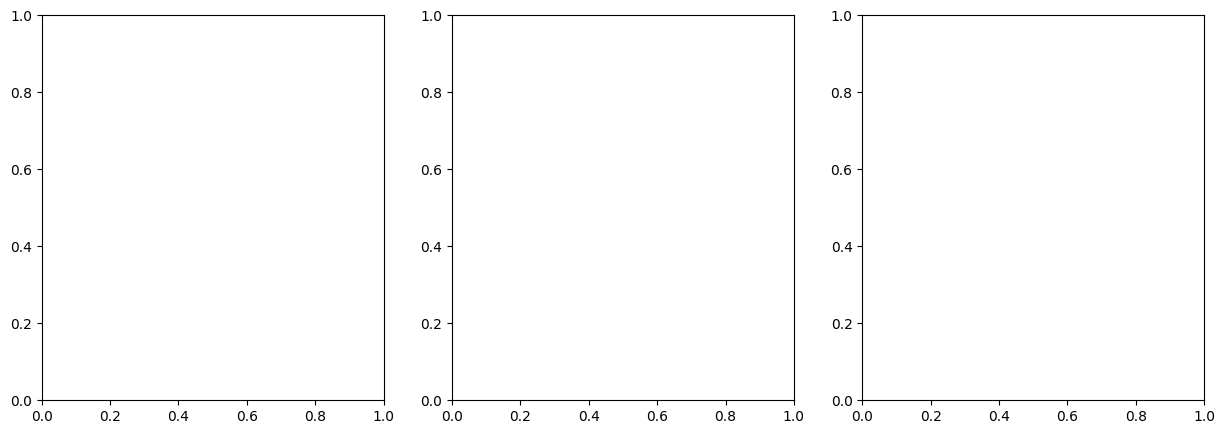

In [327]:
# Create a figure with subplots based on the number of dataframes
tls_list = ['tls_159_state', 'tls_160_state', 'tls_161_state'] # list of all possible states
unique_state_lists = [tls_159_states, tls_160_states, tls_161_states] # list of lists of unique states for each traffic light
df_list = [(df_speed, 'Speed'), (df_queue, 'Queue'), (df_waitTime, 'WaitTime')]
    #    (df_brake_accel, 'Brake_Accel'), (df_pressure, 'Pressure'), (df_brake, 'Brake'), 
    #    (df_combinedEmission, 'CombinedEmission'), (df_brake_speed, 'Brake_Speed')] # list of dataframes

# for each traffic light

j = 0
for tls in tls_list:
    
    num_dataframes = len(df_list)
    fig, axs = plt.subplots(1, num_dataframes, figsize=(5*num_dataframes, 5))
    
    # for each reward type in df_list
    for i, col in enumerate(df_list):
        
        df = col[0]
        name = col[1]
        
        # create transition matrix and plot heatmap
        def transition_matrix(transitions, num_phases):
            phases = list(set(phase for transition in transitions for phase in transition))
            phase_to_index = {phase: index for index, phase in enumerate(phases)}
            matrix = [[0] * num_phases for _ in range(num_phases)]
            for (phase1, phase2) in transitions:
                i = phase_to_index[phase1]
                j = phase_to_index[phase2]
                matrix[i][j] += 1
            return matrix

        def normalize_matrix(matrix):
            normalized_matrix = []
            for row in matrix:
                row_sum = sum(row)
                if row_sum != 0:
                    normalized_row = [value / row_sum for value in row]
                else:
                    normalized_row = [0] * len(row)
                normalized_matrix.append(normalized_row)
            return normalized_matrix
        
        def create_heatmap(matrix, states, ax):
            sns.heatmap(matrix, square=True, xticklabels=unique_state_lists[j], yticklabels=unique_state_lists[j] if i==1 else None, ax=ax, cbar=i==num_dataframes-1, cbar_ax=None if i == num_dataframes-1 else False)
            ax.set_xlabel("Next State")
            ax.set_ylabel("Current State" if i == 0 else "")
            ax.set_title(f"Phase Transition Probability for Traffic Light Switches ({name})" if i == 1 else "")
            #ax.set_aspect("equal")

        # append all states collected during training to list
        tls_allStates = df[col].tolist()
        tls_allStates.append(x for x in unique_state_lists[j] if x not in tls_allStates)

        # get number of distinct phases
        num_phases = len(unique_state_lists[j])

        # create list of tuples for state transitions
        transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

        # create transition matrix
        matrix = transition_matrix(transitions, num_phases)
        #print(matrix)

        # normalize matrix
        transition_matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

        # plot heatmap in the corresponding subplot
        create_heatmap(transition_matrix, unique_state_lists[j], axs[i])
        
    j += 1

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()


# plot heatmap
#create_heatmap(transition_matrix, set(tls_160_states))